<h1><center>Plantilla CRISP-DM: "Climas de Australia"</center></h1> 


**Integrantes:** 
* Alejandro Ferrera
* Nicolas Dávila
* Diego Gieminiani



| Columna     | Descripción                                                                                          |
|-------------|------------------------------------------------------------------------------------------------------|
| Fecha       | Fecha de la observación                                                                              |
| Ubicación   | Ubicación de la estación meteorológica                                                               |
| MinTemp     | Temperatura mínima en grados Celsius                                                                 |
| MaxTemp     | Temperatura máxima en grados Celsius                                                                 |
| Lluvia      | Cantidad de lluvia registrada ese día en mm.                                                         |
| Evaporación | Evaporación (mm) en 24 horas                                                                         |
| Sol         | Número de horas de sol brillante en el día                                                           |
| DirRafaga   | Dirección de la ráfaga de viento más fuerte en 24 horas.                                             |
| VelRafaga   | Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.                                     |
| Dir9am      | Dirección del viento a las 9am                                                                       |
| Dir3pm      | Dirección del viento a las 3pm                                                                       |
| Vel9am      | Velocidad (km/hr) del viento a las 9am                                                               |
| Vel3pm      | Velocidad (km/hr) del viento a las 3pm                                                               |
| Hum9am      | Porcentaje de humedad a las 9am                                                                      |
| Hum3pm      | Porcentaje de humedad a las 3pm                                                                      |
| Pres9am     | Presión atmosférica (hpa) a nivel del mar a las 9am                                                  |
| Pre3pm      | Presión atmosférica (hpa) a nivel del mar a las 3pm                                                  |
| Nub9am      | Fracción del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto. |
| Nub3pm      | Fracción del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto. |
| Temp9am     | Temperatura en grados Celsius a las 9am                                                              |
| Temp3pm     | Temperatura en grados Celsius a las 3pm                                                              |
| Lluvia Hoy  | Variable indicadora que toma el valor 1 si la precipitación es en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no. |
| RISK_MM     | La cantidad de lluvia. Una especie de medida del "riesgo".                                            |
| Lluvia Man  | Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.                        |


## Fase 1: Business Understanding 

### <span >Contexto del caso</span>

Se dispone de un set de datos de observaciones meteorológicas diarias de múltiples ubicaciones en
Australia, obtenidas de la Oficina de Meteorología de la Commonwealth de Australia y procesadas
para crear este conjunto de datos de muestra, los datos se han procesado para proporcionar una
variable objetivo RainTomorrow(si hay lluvia al día siguiente - No / Sí) y una variable de riesgo
RISK_MM(cuánta lluvia registrada en milímetros), esta información se ha dejado disponible para que
usted la explore y busque información que sea relevante para demostrar su aprendizaje de Minería
de datos.

Para poder dar el mejor apoyo en la toma de decisiones de "Climas de Australia" nos encontramos con desafíos como:
- Identificar patrones y relaciones en los datos de las caracteristicas del clima para entender mejor su comportamiento.
- Desarrollar modelos de machine learning que permitan predecir comportamientos clave del clima y entender como predecir las variables objetivo.
- Evaluar la importancia de las diferentes variables en la predicción de los comportamientos de los clientes.


### Carga de dataset y dependencias

In [60]:
! pip install imblearn


[notice] A new release of pip available: 22.3 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [62]:
#Carga de dataset

df = pd.read_csv('temperatura.csv', sep=',', low_memory=False)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [63]:
df.info(max_cols=30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Fase 2: Data Understanding 

### Análisis estadístico

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


### Tipos de datos

#### 1. Análisis de los tipos de datos

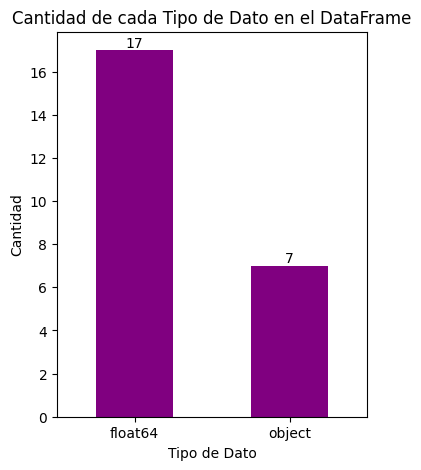

In [65]:
data_types_counts = df.dtypes.value_counts()

plt.figure(figsize=(4, 5))
ax = data_types_counts.plot(kind='bar', rot=0, color='purple')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada Tipo de Dato en el DataFrame')
plt.show()

**Recomendación**: Transformar las variables de tipo object a un tipo de dato más adecuado para su análisis.

#### 2. Revisión de datos tipo object

In [66]:
df_object = df.select_dtypes(include=['object'])
print('Columnas de tipo object')
for col in df_object.columns:
    print(f"Columna {col} valores únicos -> {df_object[col].unique()[:5]}")


Columnas de tipo object
Columna Date valores únicos -> ['2008-12-01' '2008-12-02' '2008-12-03' '2008-12-04' '2008-12-05']
Columna Location valores únicos -> ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree']
Columna WindGustDir valores únicos -> ['W' 'WNW' 'WSW' 'NE' 'NNW']
Columna WindDir9am valores únicos -> ['W' 'NNW' 'SE' 'ENE' 'SW']
Columna WindDir3pm valores únicos -> ['WNW' 'WSW' 'E' 'NW' 'W']
Columna RainToday valores únicos -> ['No' 'Yes' nan]
Columna RainTomorrow valores únicos -> ['No' 'Yes']


In [67]:
# Obtener los valores únicos de la columna 'ubicacion'
valores_unicos = df['Location'].unique()

# Imprimir los valores únicos
print(valores_unicos)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


**Recomendaciones:**
- Date: Se recomienda excluir esta columna del análisis debido a que como valores únicos contamos con solo 5 fechas y además no serán relevantes para la etapa de modelado.
- Location: Realizar One-Hot Encoding.
- WindGustDir, WindDir9am y WindDir3pm: Realziar One-Hot Encoding con los valores conocidos.
- RainToday: Realizar un tratamiento especial para los trabajar datos nulos completando con la moda o eliminandolos. Sumado a lo anterior realizar la conversión a binario.
- RainTomorrow: Se trata de una de nuestras variables objetvo y se recomienda realizar la conversión a binario.

#### 3. Búsqueda de valores nulos 

##### 3.1 Datos Nulos porcentual

In [68]:
#Saber porcentaje de valores nulos por columna
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=True) / df.shape[0] * 100

MaxTemp           0.226453
MinTemp           0.447983
Temp9am           0.635756
WindSpeed9am      0.948007
Rainfall          0.988797
RainToday         0.988797
Humidity9am       1.247600
WindSpeed3pm      1.849599
Temp3pm           1.917113
Humidity3pm       2.538803
WindDir3pm        2.656952
WindGustSpeed     6.519308
WindGustDir       6.561504
WindDir9am        7.041838
Pressure3pm       9.832411
Pressure9am       9.855619
Cloud9am         37.735332
Cloud3pm         40.152469
Evaporation      42.789026
Sunshine         47.692924
dtype: float64

##### 3.2 Datos Nulos  por cantidad de valores

In [69]:
null_counts[null_counts > 0].sort_values(ascending=False)


Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
dtype: int64

##### 3.3 Análisis de columnas con más de 10% de valores nulos

- Lo primero que haremos es revisar los valores únicos para descartar que los valores nulos representen algo en cada columna y entender los posibles valores

In [70]:
columns_of_interest = [
    'MaxTemp', 'MinTemp', 'Temp9am', 'WindSpeed9am', 
    'Rainfall', 'RainToday', 'Humidity9am', 
    'WindSpeed3pm', 'Temp3pm', 'Humidity3pm', 'WindDir3pm',
    'WindGustSpeed','WindGustDir','WindDir9am','Pressure3pm','Pressure9am'
]

for column in columns_of_interest:
    unique_values = df[column].unique().tolist()
    print(f"Valores únicos de la columna {column} -> {unique_values}")


Valores únicos de la columna MaxTemp -> [22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26.7, 31.9, 30.1, 30.4, 21.7, 18.6, 21.0, 27.7, 20.9, 22.5, 25.6, 29.3, 33.0, 31.8, 30.9, 32.4, 33.9, 32.7, 27.2, 24.2, 24.4, 26.5, 23.9, 28.8, 34.6, 35.8, 37.9, 38.9, 28.3, 28.4, 30.8, 32.0, 34.7, 37.7, 43.0, 32.2, 36.6, 39.9, 38.1, 34.0, 35.2, 30.6, 34.3, 38.4, 38.2, 40.7, 41.5, 42.9, 42.7, 43.1, 38.3, 36.9, 41.2, 42.2, 44.8, 40.2, 31.2, 27.3, 21.6, 29.0, 29.2, 31.3, 31.1, 29.1, 31.7, 33.2, 29.6, 32.6, 34.5, 30.3, 22.1, 22.0, 24.0, 27.9, 30.2, 30.5, 25.8, 27.0, 19.7, 21.9, 25.3, 33.5, 33.6, 30.0, 31.6, 22.3, 29.8, 27.6, 28.9, 29.9, 32.1, 28.1, 21.4, 24.9, 25.4, 20.0, 23.4, 22.7, 16.2, 15.8, 12.9, 11.5, 14.5, 12.2, 16.5, 17.0, 19.2, 18.9, 19.1, 18.8, 19.3, 18.4, 19.0, 20.5, 19.5, 17.7, 18.5, 15.1, 16.3, 16.6, 16.4, 15.6, 19.8, 21.1, 20.3, 18.1, 15.7, 16.8, 17.1, 14.3, 13.4, 17.4, 16.1, 10.5, 11.6, 12.0, 8.8, 9.6, 8.2, 12.4, 14.9, 15.9, 14.7, 15.3, 17.3, 15.5, 14.1, 13.7, 11.9, 12.3, 13.3, 13.2, 12.1, 12

**Recomendaciones**: 
- Las columnas con menos de 10%, teniendo el contexto del caso, lo mejor sería utilizar KNNImputer o DecisionTree debido a la relevancia que tendrá cada variable pero debido al bajo porcentaje podría decidirse imputar por la moda o promedio.
- También se recomienda castear las columnas RainToday, WindDir3pm, WindGustDir y WindDir9am con One-Hot Encoding

##### 3.3 Análisis de columnas con menos de 10% de valores nulos

- Lo primero que haremos es revisar los valores únicos para descartar que los valores nulos representen algo en cada columna y entender los posibles valores

In [71]:
columns_of_interest10 = ['Cloud9am','Cloud3pm','Evaporation','Sunshine']

for column in columns_of_interest10:
    unique_values = df[column].unique().tolist()
    print(f"Valores únicos de la columna {column} -> {unique_values}")


Valores únicos de la columna Cloud9am -> [8.0, nan, 7.0, 1.0, 0.0, 5.0, 4.0, 2.0, 6.0, 3.0, 9.0]
Valores únicos de la columna Cloud3pm -> [nan, 2.0, 8.0, 7.0, 1.0, 5.0, 4.0, 6.0, 3.0, 0.0, 9.0]
Valores únicos de la columna Evaporation -> [nan, 12.0, 14.8, 12.6, 10.8, 11.4, 11.2, 13.0, 9.8, 14.6, 11.0, 12.8, 13.8, 16.4, 17.4, 16.0, 13.6, 8.0, 8.2, 8.6, 14.2, 15.8, 16.2, 13.4, 14.4, 11.8, 15.6, 15.2, 11.6, 9.6, 6.6, 0.6, 6.0, 3.0, 2.0, 5.2, 9.0, 10.2, 10.0, 7.4, 8.4, 9.2, 9.4, 12.4, 10.4, 7.2, 6.8, 7.6, 4.4, 6.4, 7.8, 7.0, 8.8, 6.2, 5.8, 0.2, 2.4, 1.8, 2.2, 2.8, 5.0, 5.6, 4.8, 4.2, 4.0, 3.2, 4.6, 3.4, 3.6, 0.0, 1.4, 3.8, 0.8, 2.6, 1.6, 1.2, 1.0, 5.4, 10.6, 16.8, 17.0, 20.2, 14.0, 17.2, 12.2, 15.0, 18.2, 13.2, 4.1, 1.7, 0.4, 1.9, 64.8, 32.0, 26.2, 24.6, 23.3, 15.4, 32.6, 30.4, 34.4, 18.0, 49.4, 18.8, 19.0, 18.4, 8.1, 4.9, 25.2, 24.0, 22.4, 16.6, 48.8, 56.2, 37.0, 52.4, 17.6, 6.3, 20.0, 21.4, 25.0, 17.8, 25.6, 18.6, 21.6, 35.4, 23.0, 22.0, 30.8, 11.1, 19.8, 33.2, 86.2, 65.8, 56.4, 31.2, 21

**Recomendación**: Las columnas con más de 10%, teniendo el contexto del caso, se recomienda utilizar KNNImputer o DecisionTree debido descartando por completo imputar por la moda o promedio. Esto debido a la relevancia que tendrá cada variable y más aún teniendo en cuenta el alto porcentaje de valores nulos que puede alcanzar hasta un 47%.

#### 4 Revisión de Outliers

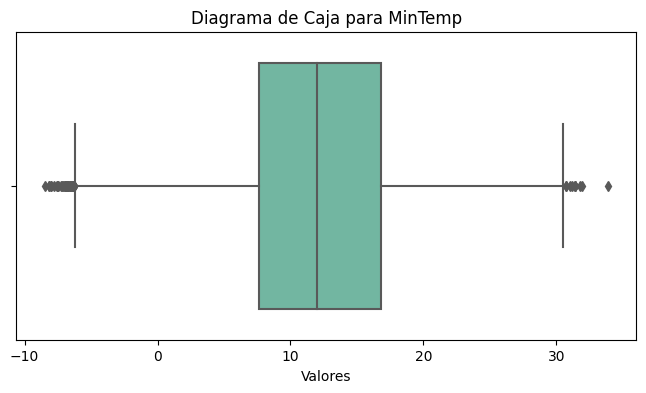

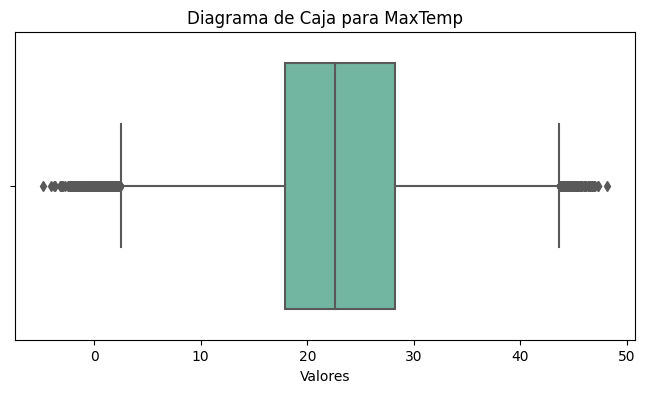

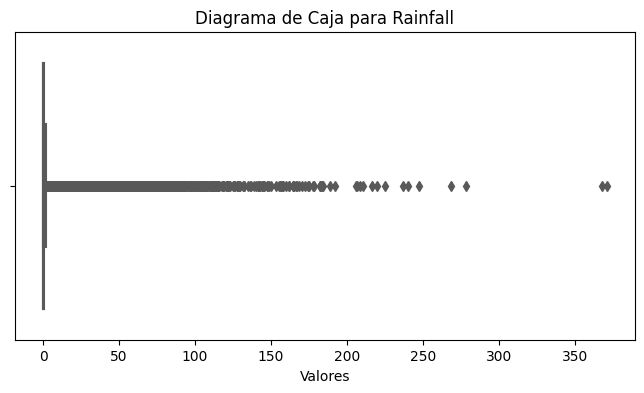

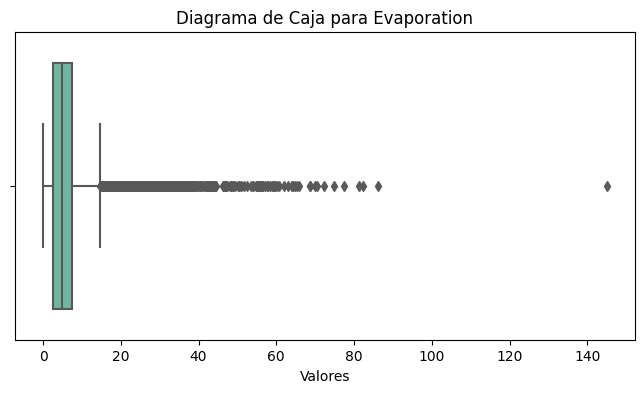

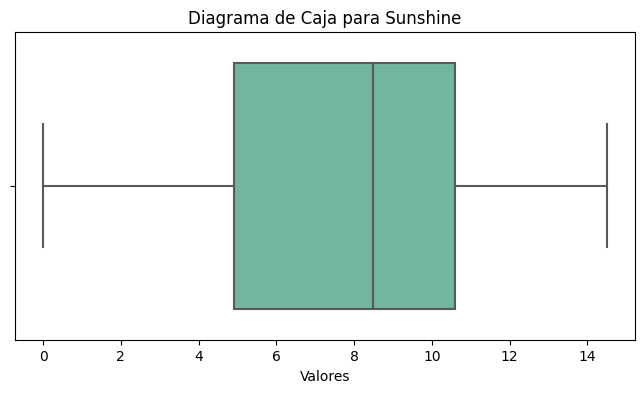

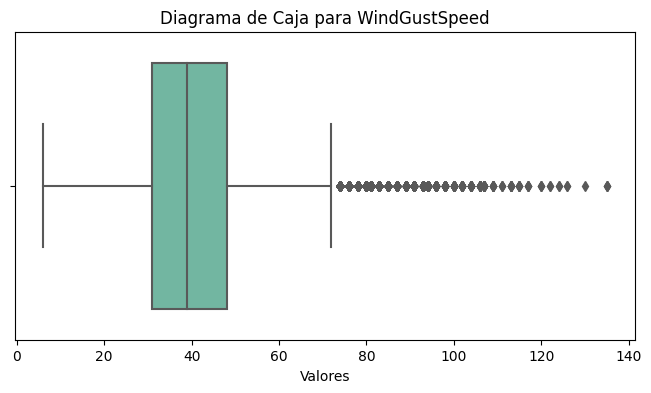

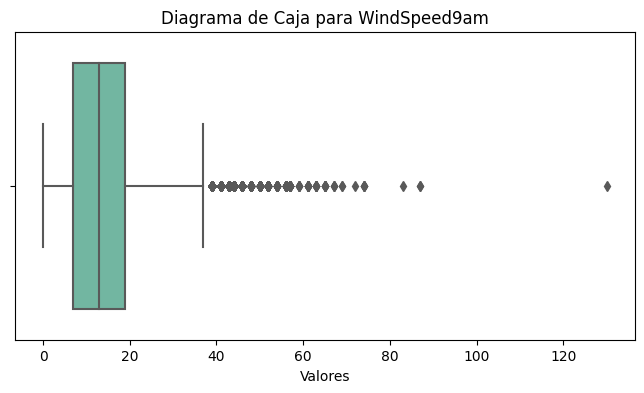

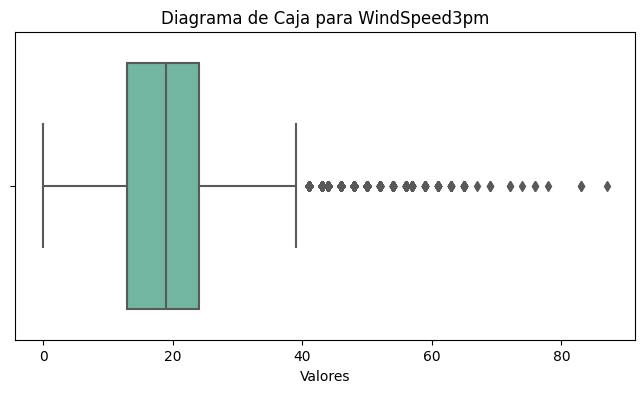

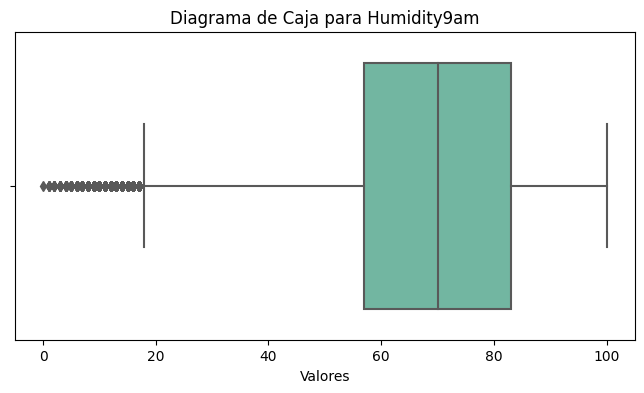

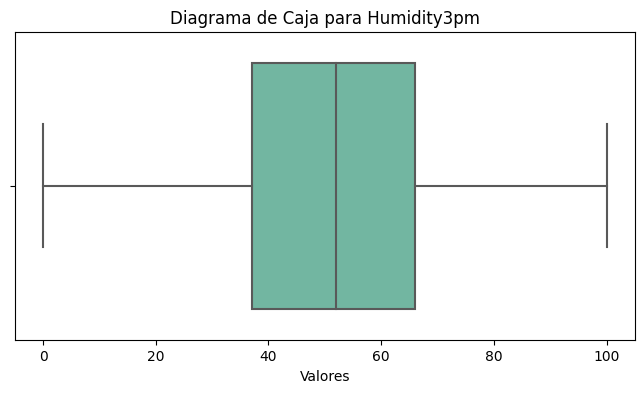

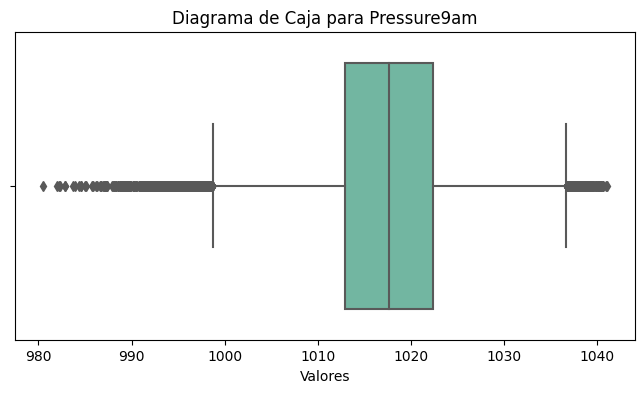

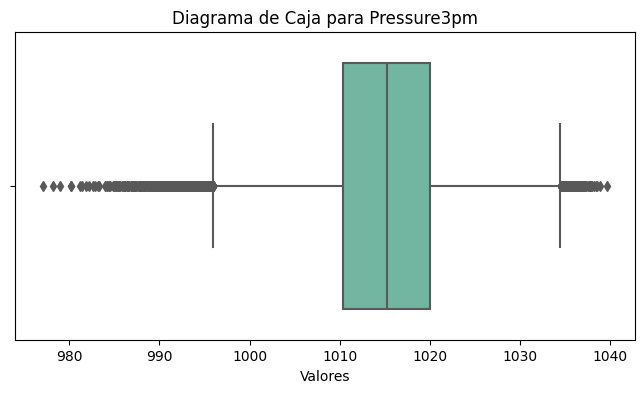

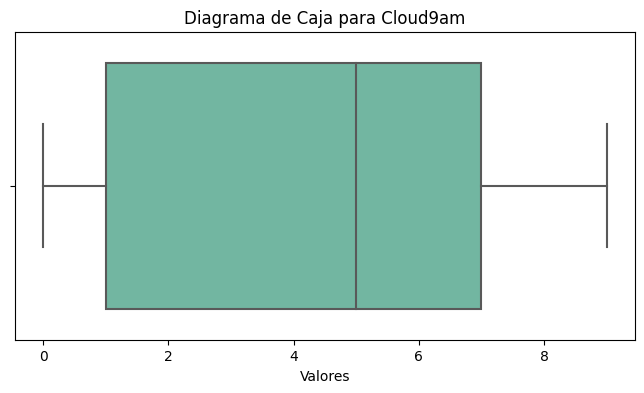

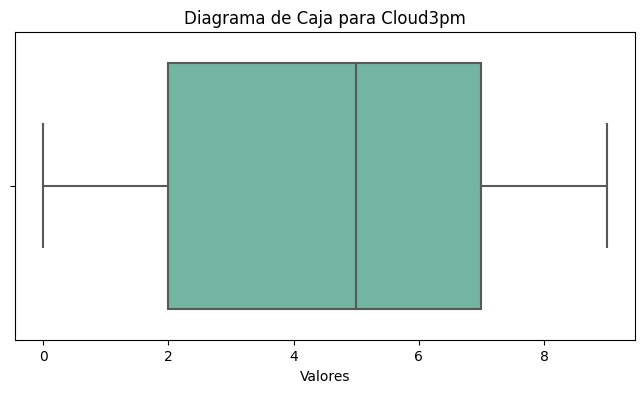

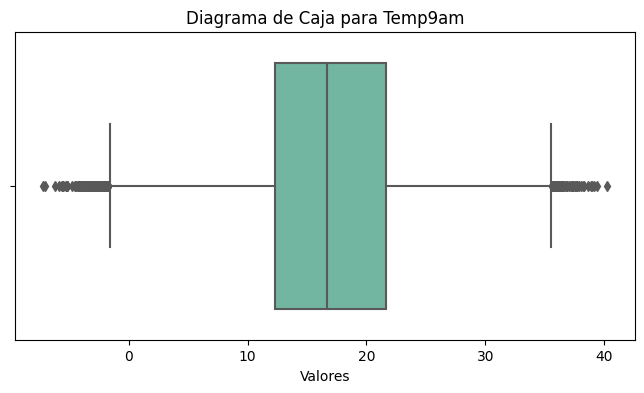

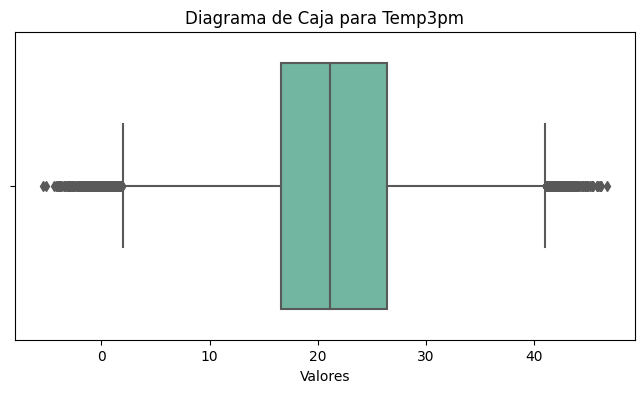

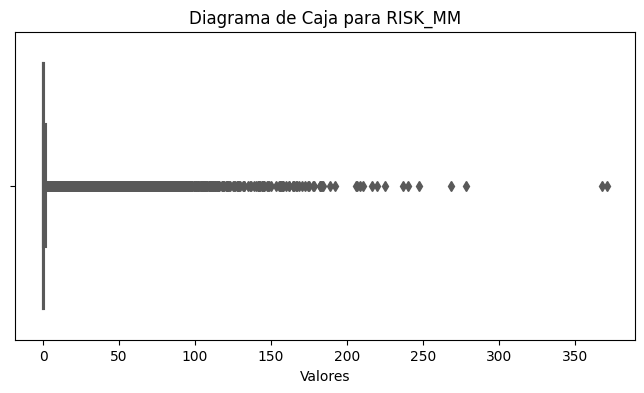

In [72]:
df.describe()

columnas_relevantes = ['MinTemp','MaxTemp','Rainfall',
'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM']  # Asegúrate de ajustar esto según tus necesidades
df_business_understanding = df[columnas_relevantes]

# Crear un gráfico de caja para cada variable numérica por separado
for columna in df_business_understanding.columns:
    plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico según necesites
    sns.boxplot(x=df_business_understanding[columna], palette="Set2")
    plt.title(f'Diagrama de Caja para {columna}')
    plt.xlabel('Valores')
    plt.show()

In [73]:
for columna in df_business_understanding.columns:
    q1 = df_business_understanding[columna].quantile(0.25)
    q3 = df_business_understanding[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Contar outliers
    outliers = df_business_understanding[columna][(df_business_understanding[columna] < limite_inferior) | (df_business_understanding[columna] > limite_superior)]
    cantidad_outliers = outliers.count()
    porcentaje_outliers = (cantidad_outliers / df_business_understanding.shape[0]) * 100

    # Imprimir resultados
    print(f"La cantidad de outliers en la variable {columna} es: {cantidad_outliers}")
    print(f"El porcentaje de outliers en la variable {columna} es: {round(porcentaje_outliers, 2)}%")
    print("\n")

La cantidad de outliers en la variable MinTemp es: 62
El porcentaje de outliers en la variable MinTemp es: 0.04%


La cantidad de outliers en la variable MaxTemp es: 459
El porcentaje de outliers en la variable MaxTemp es: 0.32%


La cantidad de outliers en la variable Rainfall es: 25228
El porcentaje de outliers en la variable Rainfall es: 17.74%


La cantidad de outliers en la variable Evaporation es: 1954
El porcentaje de outliers en la variable Evaporation es: 1.37%


La cantidad de outliers en la variable Sunshine es: 0
El porcentaje de outliers en la variable Sunshine es: 0.0%


La cantidad de outliers en la variable WindGustSpeed es: 3006
El porcentaje de outliers en la variable WindGustSpeed es: 2.11%


La cantidad de outliers en la variable WindSpeed9am es: 1739
El porcentaje de outliers en la variable WindSpeed9am es: 1.22%


La cantidad de outliers en la variable WindSpeed3pm es: 2458
El porcentaje de outliers en la variable WindSpeed3pm es: 1.73%


La cantidad de outliers e

**Recomendaciones:** 
1. Para las columnas Rainfall, RISK_MM, WindGustSpeed, WindSpeed9am, WindSpeed3pm: Dejar los datos atípicos, ya que serán importantes para predecir los futuros target preseleccionados.
2. Evaporation,  Humidity9am,  Humidity3pm, Pressure9am y Pressure3pm: Se recomienda aplicar transformaciones para normalizar su distribución y reducir el impacto de valores extremadamente altos en el análisis.
3. Para el resto de campos al ser menos al 1% podemos mantenerlos y considerar trabajarlos solo si es necesario mejorar para el modelado.

#### 5 Distribución de datos para variables objetivo

##### 5.1 RainTomorrow

In [74]:
rain_tomorrow_counts = df['RainTomorrow'].value_counts()

print(rain_tomorrow_counts)

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


In [75]:
rain_tomorrow_percentages = df['RainTomorrow'].value_counts(normalize=True) * 100

print("Porcentaje de registros según 'RainTomorrow':")
print(rain_tomorrow_percentages)

Porcentaje de registros según 'RainTomorrow':
RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64


**Recomendación**:  Utilizar técnicas de sobremuestreo para generar registros y así equilibrar la distribución

##### 5.2 RISK_MM

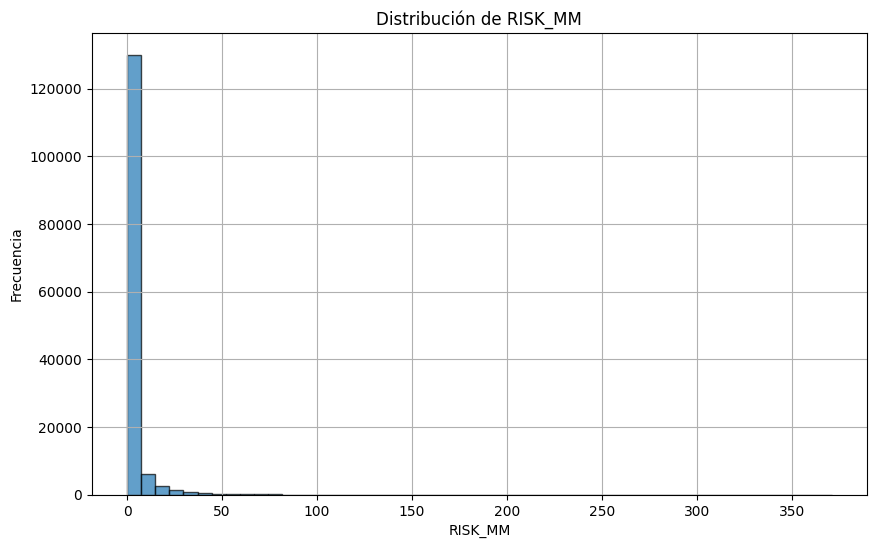

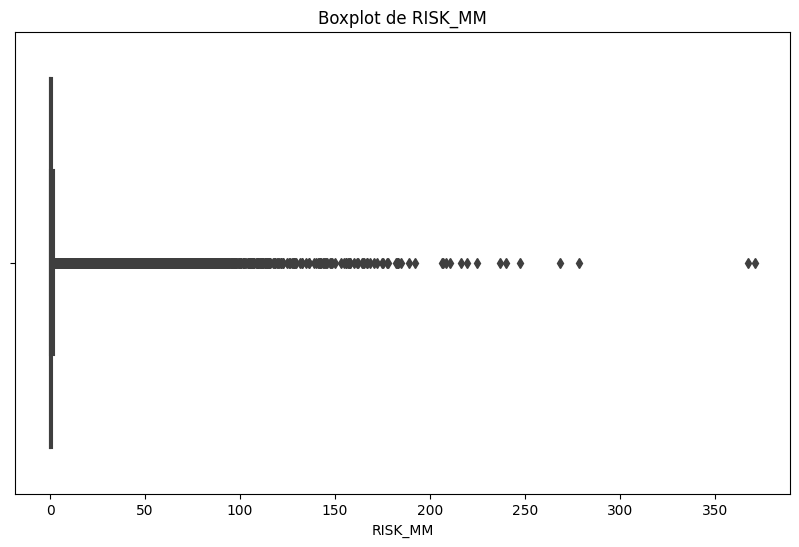

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(df['RISK_MM'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de RISK_MM')
plt.xlabel('RISK_MM')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['RISK_MM'])
plt.title('Boxplot de RISK_MM')
plt.xlabel('RISK_MM')
plt.show()


In [77]:
# Estadísticas descriptivas
risk_mm_stats = df['RISK_MM'].describe()
print("Estadísticas descriptivas de RISK_MM:")
print(risk_mm_stats)


Estadísticas descriptivas de RISK_MM:
count    142193.000000
mean          2.360682
std           8.477969
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: RISK_MM, dtype: float64


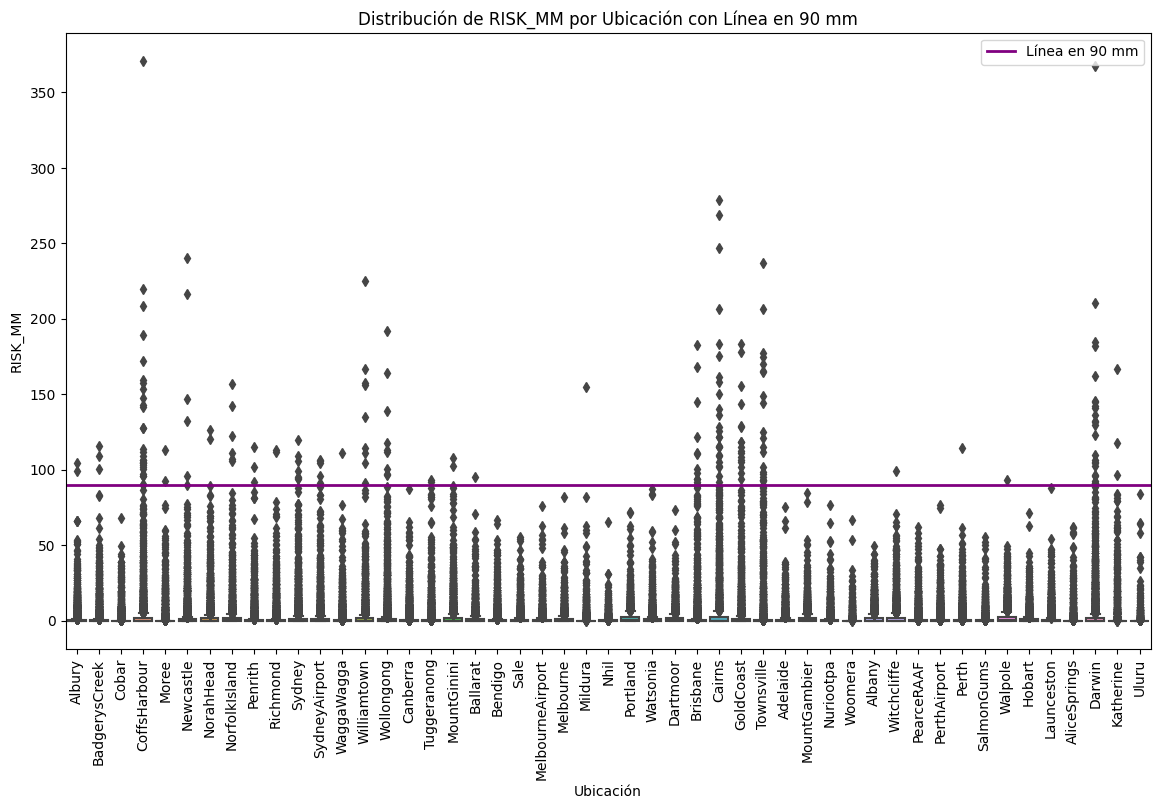

In [78]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de caja para RISK_MM por Location
ax = sns.boxplot(x='Location', y='RISK_MM', data=df)

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de RISK_MM por Ubicación con Línea en 90 mm')
plt.xlabel('Ubicación')
plt.ylabel('RISK_MM')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Añadir línea horizontal en 90 mm de RISK_MM
plt.axhline(y=90, color='purple', linestyle='-', linewidth=2, label='Línea en 90 mm')

# Añadir leyenda para la línea en 90 mm
plt.legend()

# Mostrar el gráfico
plt.show()

In [79]:
count_risk_mm_high = (df['RISK_MM'] > 250).sum()
print(f"Cantidad de registros con RISK_MM > 250: {count_risk_mm_high}")


Cantidad de registros con RISK_MM > 250: 4


**Análisis:** Las regiones con mayor pick de RISK_MM coinciden con las regiones en las que normalmente llueve mas de acuerdo a las condiciones meteorológicas comunes de Australia y a su geografía.
Esto se determinó teniendo en cuenta una linea que señala los 90mm, siendo esta la medida de riesgo máxima a la hora de preedcir la precipitación.

**Recomendación:** Se recomienda eliminar los registros con mas de 250 mm ya que pueden representar un riesgo en el sesgo de nuestras predicciones.

## Fase 3: Data Preparation 

### Transformación, eliminación e imputación de datos

#### 1. Unificación de datos nulos

Debido a que es probable que hayan datos nulos escritos de diferentes maneras, dejaremos todos los datos como np.nan

In [80]:
na_values = ('np.nan','NA','NaN','nan','inf','NULL')
df = df.replace(na_values, np.nan)

#### 2. Imputación promedio para columnas con menos del 10% de valores nulos

Se imputara usando el promedio o moda según sea el caso

In [81]:
# Columnas a imputar
numeric_columns = ['MaxTemp', 'MinTemp', 'Temp9am', 'WindSpeed9am', 'WindGustSpeed', 'Rainfall', 
                   'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'Humidity3pm', 
                   'Pressure3pm', 'Pressure9am']

categorical_columns = ['RainToday', 'WindDir3pm', 'WindGustDir', 'WindDir9am']

# Imputación para columnas numéricas
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Imputación para columnas categóricas
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Verificar la imputación
print(df.isnull().sum())

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64


#### 3. Imputación de columnas con valores nulos mayores al 10% por KNNImputer

In [82]:
# Columnas a imputar con KNNImputer
knn_columns = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

# Crear una copia del DataFrame para evitar la imputación en columnas no necesarias
df_knn = df[knn_columns].copy()

# KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Realizar la imputación
df_knn_imputed = knn_imputer.fit_transform(df_knn)

# Convertir el resultado de nuevo a DataFrame y asignar los nombres de las columnas
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=knn_columns)

# Reemplazar las columnas originales con las columnas imputadas
df[knn_columns] = df_knn_imputed

# Verificar la imputación
print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


Revisión de columnas con datos nulos

In [83]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

#### 4. Eliminación de registros con mas de 250 en RISK_MM

In [84]:
# Eliminar los registros donde RISK_MM > 250
df = df[df['RISK_MM'] <= 250]

# Verificamos el tamaño del DataFrame original y el filtrado
print(f"Tamaño original del DataFrame: {df.shape[0]}")
print(f"Tamaño del DataFrame después de eliminar RISK_MM > 250: {df.shape[0]}")


Tamaño original del DataFrame: 142189
Tamaño del DataFrame después de eliminar RISK_MM > 250: 142189


####  5. Eliminación de la columna Date

In [85]:
# df = df.drop(columns=['Date'])

#### Aahh se la creyó jajaja
#### 5. Transformación de la columna date para facilitar su uso
 
En este caso se deció transformar las fechas solo a meses del año así podremos manejar una mayor precisión con los 12 meses del año en lugar de solo 4 tipos en las estaciones.

In [86]:
# Convertir la columna 'Date' a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer solo el mes y reemplazar la columna 'Date' con el mes
df['Date'] = df['Date'].dt.month

# Imprimir el DataFrame resultante
print(df)

        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0         12   Albury     13.4     22.9       0.6     4.560000  2.840000   
1         12   Albury      7.4     25.1       0.0     5.469824  7.624853   
2         12   Albury     12.9     25.7       0.0     4.440000  8.480000   
3         12   Albury      9.2     28.0       0.0     5.469824  7.624853   
4         12   Albury     17.5     32.3       1.0     5.880000  2.300000   
...      ...      ...      ...      ...       ...          ...       ...   
142188     6    Uluru      3.5     21.8       0.0     5.469824  7.624853   
142189     6    Uluru      2.8     23.4       0.0     5.469824  7.624853   
142190     6    Uluru      3.6     25.3       0.0     5.469824  7.624853   
142191     6    Uluru      5.4     26.9       0.0     5.469824  7.624853   
142192     6    Uluru      7.8     27.0       0.0     6.840000  9.240000   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0        

#### 6.1 Transformación de location a regiones basado en un estudio del clima para la ganadería
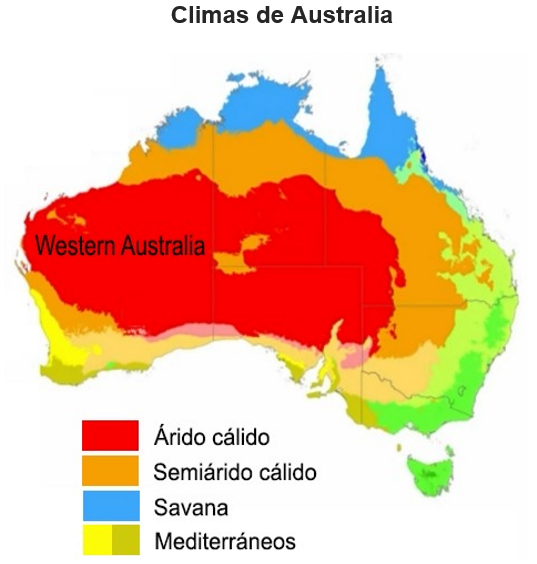

In [87]:
# Diccionario de ubicaciones y climas
ubicaciones_climas = {
    "Albury": "mediterraneo",
    "BadgerysCreek": "mediterraneo",
    "Cobar": "arido_calido",
    "CoffsHarbour": "mediterraneo",
    "Moree": "mediterraneo",
    "Newcastle": "mediterraneo",
    "NorahHead": "mediterraneo",
    "NorfolkIsland": "mediterraneo",
    "Penrith": "mediterraneo",
    "Richmond": "mediterraneo",
    "Sydney": "mediterraneo",
    "SydneyAirport": "mediterraneo",
    "WaggaWagga": "semiarido_calido",
    "Williamtown": "mediterraneo",
    "Wollongong": "mediterraneo",
    "Canberra": "mediterraneo",
    "Tuggeranong": "mediterraneo",
    "MountGinini": "mediterraneo",
    "Ballarat": "mediterraneo",
    "Bendigo": "mediterraneo",
    "Sale": "mediterraneo",
    "MelbourneAirport": "mediterraneo",
    "Melbourne": "mediterraneo",
    "Mildura": "semiarido_calido",
    "Nhil": "semiarido_calido",
    "Portland": "mediterraneo",
    "Watsonia": "mediterraneo",
    "Dartmoor": "mediterraneo",
    "Brisbane": "tropical_humedo",
    "Cairns": "Sabana",
    "GoldCoast": "tropical_humedo",
    "Townsville": "Sabana",
    "Adelaide": "mediterraneo",
    "MountGambier": "mediterraneo",
    "Nuriootpa": "mediterraneo",
    "Woomera": "arido_calido",
    "Albany": "mediterraneo",
    "Witchcliffe": "mediterraneo",
    "PearceRAAF": "mediterraneo",
    "PerthAirport": "mediterraneo",
    "Perth": "mediterraneo",
    "SalmonGums": "mediterraneo",
    "Walpole": "mediterraneo",
    "Hobart": "mediterraneo",
    "Launceston": "mediterraneo",
    "AliceSprings": "arido_calido",
    "Darwin": "Sabana",
    "Katherine": "Sabana",
    "Uluru": "arido_calido"
}

# Reemplazar los valores de la columna 'ubicacion' según el diccionario
df['Location'] = df['Location'].replace(ubicaciones_climas)
# Imprimir el DataFrame resultante
print(df)

        Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0         12  mediterraneo     13.4     22.9       0.6     4.560000  2.840000   
1         12  mediterraneo      7.4     25.1       0.0     5.469824  7.624853   
2         12  mediterraneo     12.9     25.7       0.0     4.440000  8.480000   
3         12  mediterraneo      9.2     28.0       0.0     5.469824  7.624853   
4         12  mediterraneo     17.5     32.3       1.0     5.880000  2.300000   
...      ...           ...      ...      ...       ...          ...       ...   
142188     6  arido_calido      3.5     21.8       0.0     5.469824  7.624853   
142189     6  arido_calido      2.8     23.4       0.0     5.469824  7.624853   
142190     6  arido_calido      3.6     25.3       0.0     5.469824  7.624853   
142191     6  arido_calido      5.4     26.9       0.0     5.469824  7.624853   
142192     6  arido_calido      7.8     27.0       0.0     6.840000  9.240000   

       WindGustDir  WindGus

#### 6. One Hot Encoding

In [88]:
categorical_columns = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Aplicar el encoder y transformar las columnas categóricas
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenar las columnas codificadas con el DataFrame original (excluyendo las columnas originales)
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Verificar la transformación
print(df.head())

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  12.0     13.4     22.9       0.6     4.560000  2.840000           44.0   
1  12.0      7.4     25.1       0.0     5.469824  7.624853           44.0   
2  12.0     12.9     25.7       0.0     4.440000  8.480000           46.0   
3  12.0      9.2     28.0       0.0     5.469824  7.624853           24.0   
4  12.0     17.5     32.3       1.0     5.880000  2.300000           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  ...  WindDir3pm_SSE  \
0          20.0          24.0         71.0  ...             0.0   
1           4.0          22.0         44.0  ...             0.0   
2          19.0          26.0         38.0  ...             0.0   
3          11.0           9.0         45.0  ...             0.0   
4           7.0          20.0         82.0  ...             0.0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0             0.0            0.0           0.0             1.0   
1 

In [89]:
df.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 136880
Data columns (total 75 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       142189 non-null  float64
 1   MinTemp                    142189 non-null  float64
 2   MaxTemp                    142189 non-null  float64
 3   Rainfall                   142189 non-null  float64
 4   Evaporation                142189 non-null  float64
 5   Sunshine                   142189 non-null  float64
 6   WindGustSpeed              142189 non-null  float64
 7   WindSpeed9am               142189 non-null  float64
 8   WindSpeed3pm               142189 non-null  float64
 9   Humidity9am                142189 non-null  float64
 10  Humidity3pm                142189 non-null  float64
 11  Pressure9am                142189 non-null  float64
 12  Pressure3pm                142189 non-null  float64
 13  Cloud9am                   142189 

Nos quedaremos solo con RainTomorrow_1 para la futura predicción

In [90]:
df = df.drop(columns=['RainTomorrow_No'])

In [91]:
print(df.isnull().sum())

Date                4
MinTemp             4
MaxTemp             4
Rainfall            4
Evaporation         4
                   ..
WindDir3pm_WNW      4
WindDir3pm_WSW      4
RainToday_No        4
RainToday_Yes       4
RainTomorrow_Yes    4
Length: 74, dtype: int64


In [92]:
print(f"Cantidad de registros antes de eliminar nulos: {len(df)}")

# Eliminar registros con al menos un campo nulo
df.dropna(inplace=True)

# Mostrar la cantidad de registros después de eliminar los nulos
print(f"Cantidad de registros después de eliminar nulos: {len(df)}")

Cantidad de registros antes de eliminar nulos: 142193
Cantidad de registros después de eliminar nulos: 142185


#### 7. Generación de registros para balancear RainTomorrow

In [93]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['RainTomorrow_Yes'])
y = df['RainTomorrow_Yes']

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos sobremuestreados
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['RainTomorrow_Yes'] = y_resampled

# Mostrar información sobre el nuevo DataFrame
print(df_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220630 entries, 0 to 220629
Data columns (total 74 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       220630 non-null  float64
 1   MinTemp                    220630 non-null  float64
 2   MaxTemp                    220630 non-null  float64
 3   Rainfall                   220630 non-null  float64
 4   Evaporation                220630 non-null  float64
 5   Sunshine                   220630 non-null  float64
 6   WindGustSpeed              220630 non-null  float64
 7   WindSpeed9am               220630 non-null  float64
 8   WindSpeed3pm               220630 non-null  float64
 9   Humidity9am                220630 non-null  float64
 10  Humidity3pm                220630 non-null  float64
 11  Pressure9am                220630 non-null  float64
 12  Pressure3pm                220630 non-null  float64
 13  Cloud9am                   22

In [94]:
df_resampled.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220630 entries, 0 to 220629
Data columns (total 74 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       220630 non-null  float64
 1   MinTemp                    220630 non-null  float64
 2   MaxTemp                    220630 non-null  float64
 3   Rainfall                   220630 non-null  float64
 4   Evaporation                220630 non-null  float64
 5   Sunshine                   220630 non-null  float64
 6   WindGustSpeed              220630 non-null  float64
 7   WindSpeed9am               220630 non-null  float64
 8   WindSpeed3pm               220630 non-null  float64
 9   Humidity9am                220630 non-null  float64
 10  Humidity3pm                220630 non-null  float64
 11  Pressure9am                220630 non-null  float64
 12  Pressure3pm                220630 non-null  float64
 13  Cloud9am                   22

In [95]:
rain_tomorrow_counts = df_resampled['RainTomorrow_Yes'].value_counts()

print(rain_tomorrow_counts)

RainTomorrow_Yes
0.0    110315
1.0    110315
Name: count, dtype: int64


In [96]:
rain_tomorrow_percentages = df_resampled['RainTomorrow_Yes'].value_counts(normalize=True) * 100

print("Porcentaje de registros según 'RainTomorrow_Yes':")
print(rain_tomorrow_percentages)

Porcentaje de registros según 'RainTomorrow_Yes':
RainTomorrow_Yes
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


#### 4. Manejo de Outliers

##### 4.1 Realizamos tranformaciones en las columna Evaporation,  Humidity9am,  Humidity3pm, Pressure9am y Pressure3pm

In [97]:

df_resampled['Evaporation'] = df_resampled['Evaporation'].apply(lambda x: np.log(x + 1))  # +1 para manejar 
df_resampled['Humidity9am'] = df_resampled['Humidity9am'].apply(lambda x: np.log(x + 1))
df_resampled['Humidity3pm'] = df_resampled['Humidity3pm'].apply(lambda x: np.log(x + 1))
df_resampled['Pressure9am'] = df_resampled['Pressure9am'].apply(lambda x: np.log(x + 1))
df_resampled['Pressure3pm'] = df_resampled['Pressure3pm'].apply(lambda x: np.log(x + 1))

# Verifica los resultados tras la transformación
print(df_resampled[['Evaporation', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']].head())


   Evaporation  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm
0     1.715598     4.276666     3.135494     6.916418     6.915823
1     1.867149     3.806662     3.258097     6.919289     6.916517
2     1.693779     3.663562     3.433987     6.916319     6.917409
3     1.867149     3.828641     2.833213     6.926184     6.921461
4     1.928619     4.418841     3.526361     6.919486     6.914731


In [98]:
for columna in df_resampled.columns:
    q1 = df_resampled[columna].quantile(0.25)
    q3 = df_resampled[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Contar outliers
    outliers = df_resampled[columna][(df_resampled[columna] < limite_inferior) | (df_resampled[columna] > limite_superior)]
    cantidad_outliers = outliers.count()
    porcentaje_outliers = (cantidad_outliers / df_resampled.shape[0]) * 100

    # Imprimir resultados
    print(f"La cantidad de outliers en la variable {columna} es: {cantidad_outliers}")
    print(f"El porcentaje de outliers en la variable {columna} es: {round(porcentaje_outliers, 2)}%")
    print("\n")

La cantidad de outliers en la variable Date es: 0
El porcentaje de outliers en la variable Date es: 0.0%


La cantidad de outliers en la variable MinTemp es: 64
El porcentaje de outliers en la variable MinTemp es: 0.03%


La cantidad de outliers en la variable MaxTemp es: 733
El porcentaje de outliers en la variable MaxTemp es: 0.33%


La cantidad de outliers en la variable Rainfall es: 35712
El porcentaje de outliers en la variable Rainfall es: 16.19%


La cantidad de outliers en la variable Evaporation es: 25361
El porcentaje de outliers en la variable Evaporation es: 11.49%


La cantidad de outliers en la variable Sunshine es: 7206
El porcentaje de outliers en la variable Sunshine es: 3.27%


La cantidad de outliers en la variable WindGustSpeed es: 6180
El porcentaje de outliers en la variable WindGustSpeed es: 2.8%


La cantidad de outliers en la variable WindSpeed9am es: 2863
El porcentaje de outliers en la variable WindSpeed9am es: 1.3%


La cantidad de outliers en la variable Wi

####  5. Revisión final luego de Data Preparation

##### 6.1 Cantidad de nulos

In [99]:
print(f'Cantidad total de nulos -> {df.isna().sum().sum()}')

Cantidad total de nulos -> 0


##### 6.2 Outliers finales

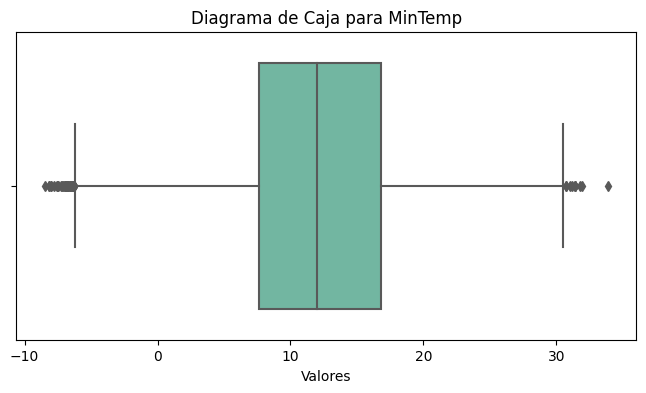

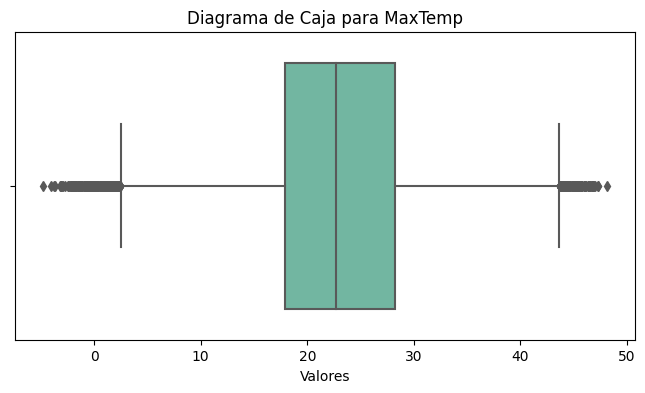

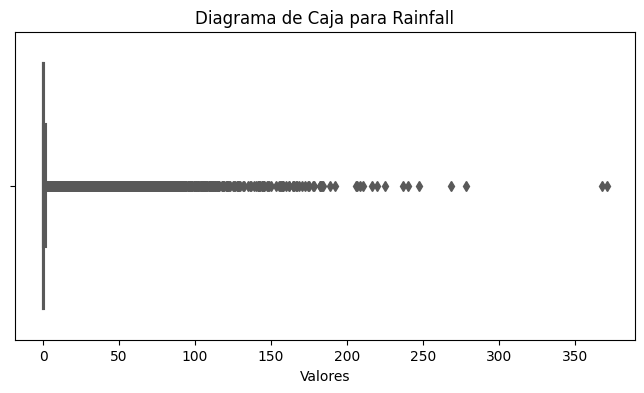

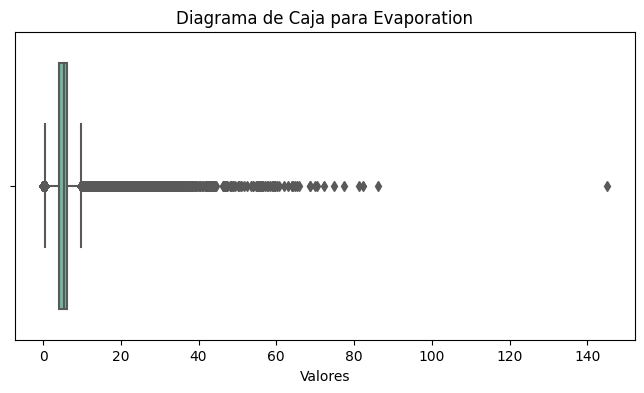

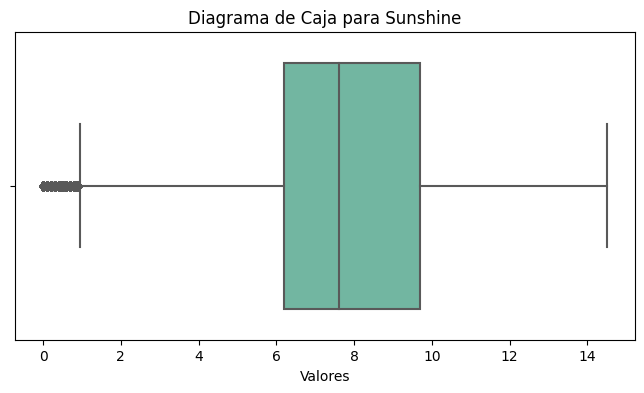

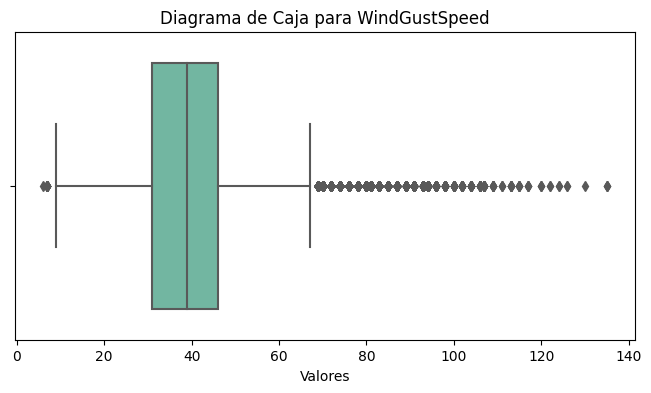

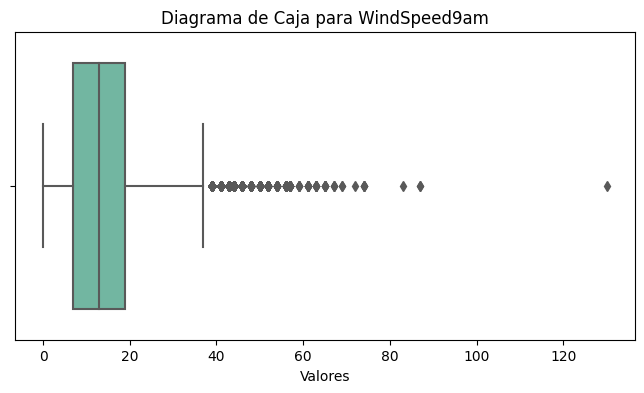

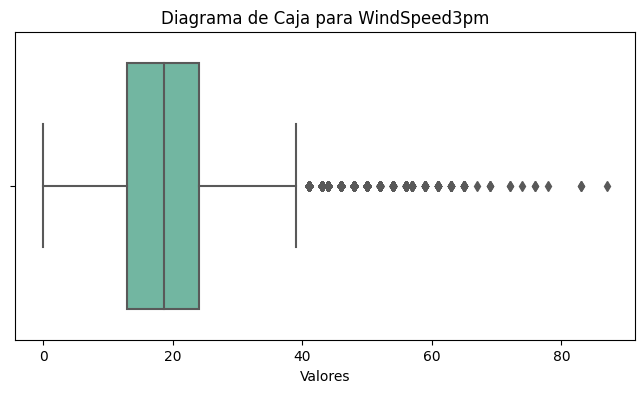

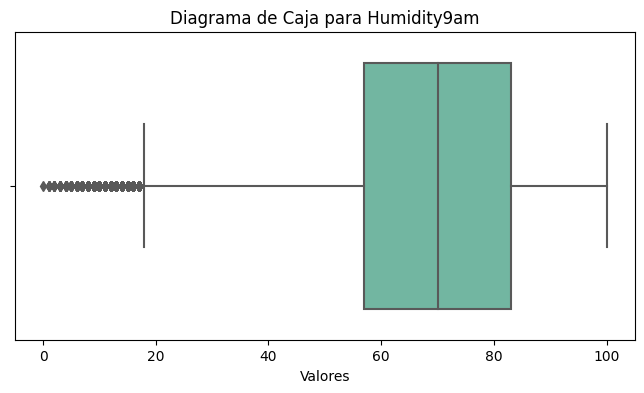

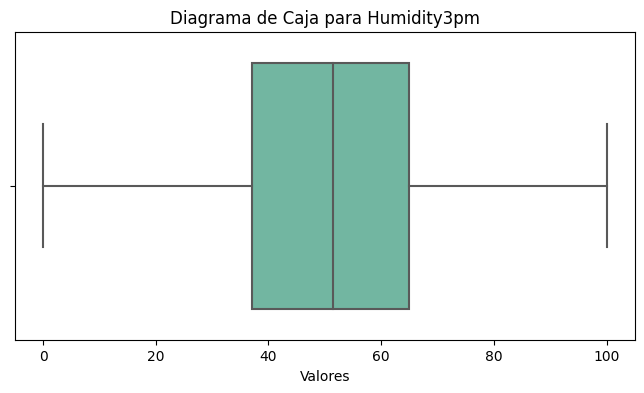

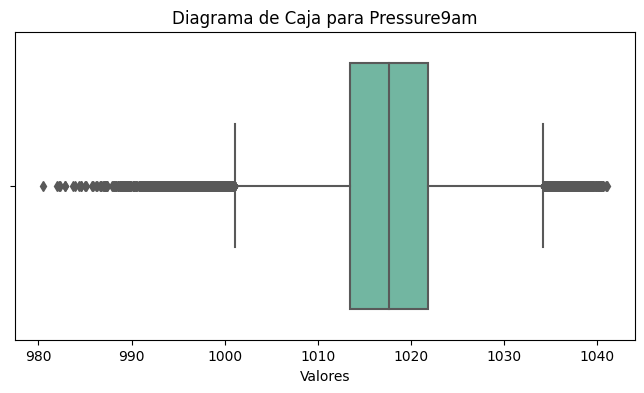

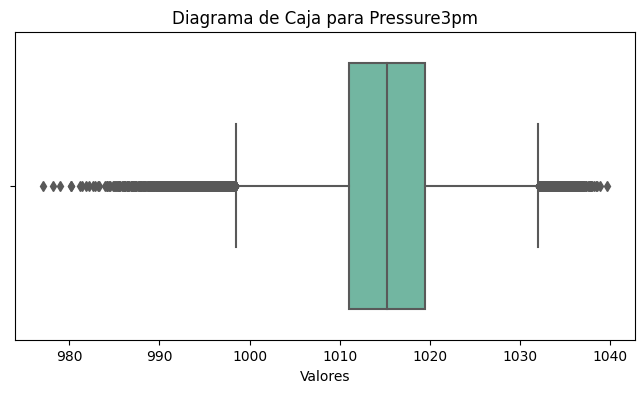

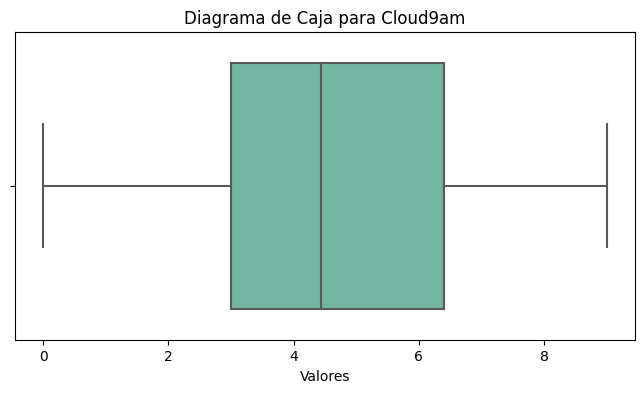

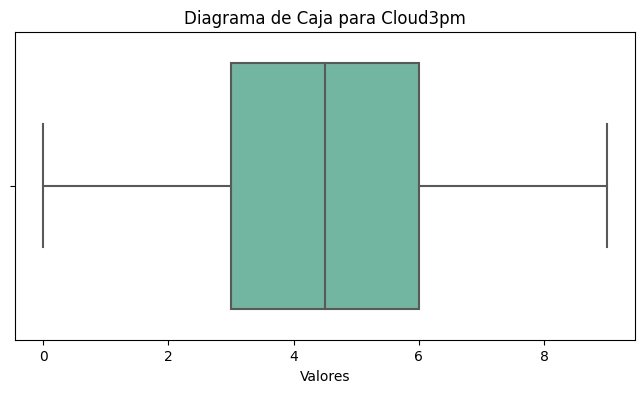

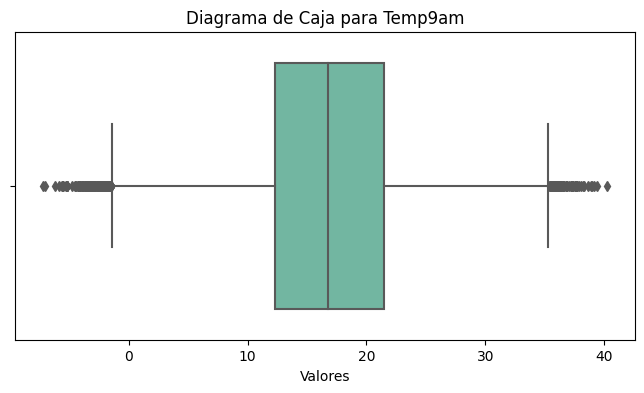

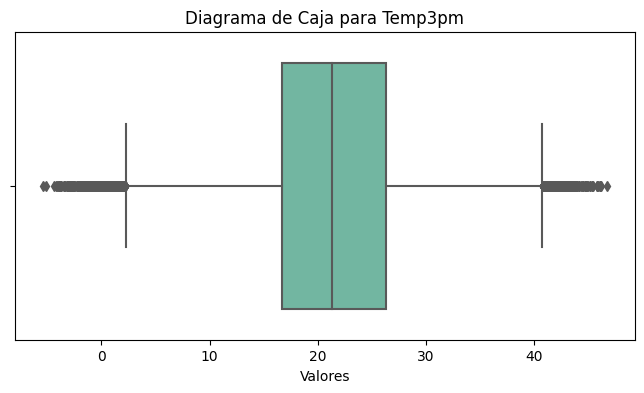

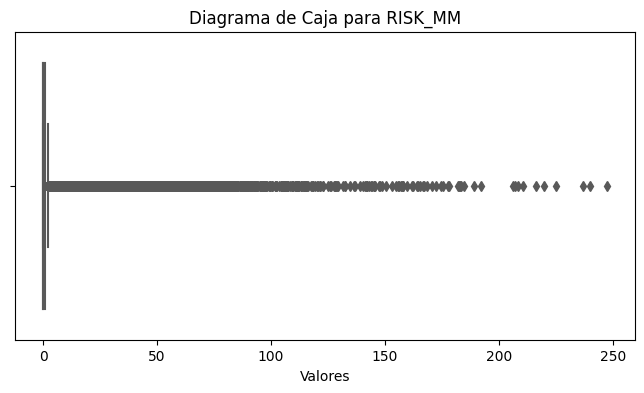

In [100]:
df.describe()

columnas_relevantes = ['MinTemp','MaxTemp','Rainfall',
'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM']  # Asegúrate de ajustar esto según tus necesidades
df_business_understanding = df[columnas_relevantes]

# Crear un gráfico de caja para cada variable numérica por separado
for columna in df_business_understanding.columns:
    plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico según necesites
    sns.boxplot(x=df_business_understanding[columna], palette="Set2")
    plt.title(f'Diagrama de Caja para {columna}')
    plt.xlabel('Valores')
    plt.show()

#### 7. DataSet Limpio

In [101]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_Yes
0,12.0,13.4,22.9,0.6,4.560000,2.840000,44.0,20.0,24.0,71.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,12.0,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,12.0,12.9,25.7,0.0,4.440000,8.480000,46.0,19.0,26.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,12.0,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12.0,17.5,32.3,1.0,5.880000,2.300000,41.0,7.0,20.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [102]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Index: 142185 entries, 0 to 142188
Data columns (total 74 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       142185 non-null  float64
 1   MinTemp                    142185 non-null  float64
 2   MaxTemp                    142185 non-null  float64
 3   Rainfall                   142185 non-null  float64
 4   Evaporation                142185 non-null  float64
 5   Sunshine                   142185 non-null  float64
 6   WindGustSpeed              142185 non-null  float64
 7   WindSpeed9am               142185 non-null  float64
 8   WindSpeed3pm               142185 non-null  float64
 9   Humidity9am                142185 non-null  float64
 10  Humidity3pm                142185 non-null  float64
 11  Pressure9am                142185 non-null  float64
 12  Pressure3pm                142185 non-null  float64
 13  Cloud9am                   142185 

## Fase 4: Modeling

### Regresión


Para nuestra predicción hemos definido la variable objecto **RISK_MM**

<Axes: >

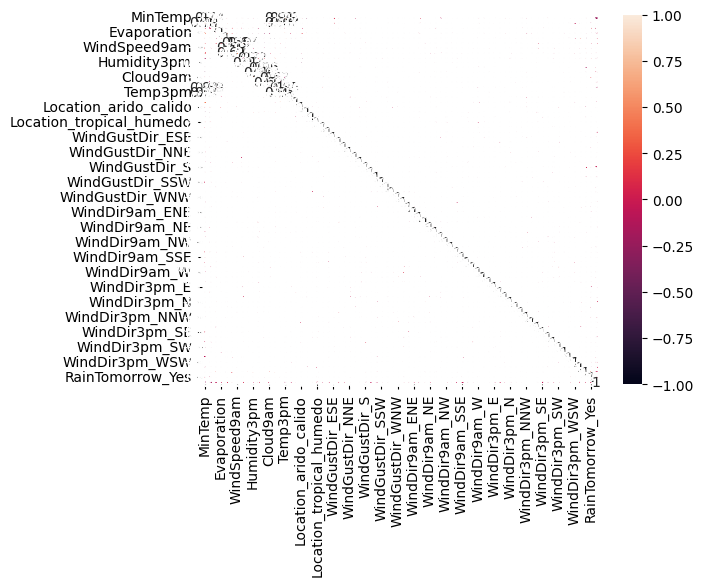

In [108]:
df_regresionTotal = df_resampled[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM',
"Location_Sabana","Location_arido_calido","Location_mediterraneo","Location_semiarido_calido","Location_tropical_humedo",
'WindGustDir_E','WindGustDir_ENE','WindGustDir_ESE','WindGustDir_N',
'WindGustDir_NE','WindGustDir_NNE','WindGustDir_NNW','WindGustDir_NW','WindGustDir_S','WindGustDir_SE','WindGustDir_SSE',
'WindGustDir_SSW','WindGustDir_SW','WindGustDir_W','WindGustDir_WNW','WindGustDir_WSW','WindDir9am_E','WindDir9am_ENE',
'WindDir9am_ESE','WindDir9am_N','WindDir9am_NE','WindDir9am_NNE','WindDir9am_NNW','WindDir9am_NW','WindDir9am_S',
'WindDir9am_SE','WindDir9am_SSE','WindDir9am_SSW','WindDir9am_SW','WindDir9am_W','WindDir9am_WNW','WindDir9am_WSW',
'WindDir3pm_E','WindDir3pm_ENE','WindDir3pm_ESE','WindDir3pm_N','WindDir3pm_NE','WindDir3pm_NNE','WindDir3pm_NNW',
'WindDir3pm_NW','WindDir3pm_S','WindDir3pm_SE','WindDir3pm_SSE','WindDir3pm_SSW','WindDir3pm_SW','WindDir3pm_W',
'WindDir3pm_WNW','WindDir3pm_WSW','RainToday_No','RainToday_Yes','RainTomorrow_Yes', 'Date']]
corr = df_regresionTotal.corr()
sns.heatmap(corr, annot=True, linewidths=.9)


Top 20 Correlación en RainTomorrow_Yes

In [105]:
# Calculamos la matriz de correlación
corr_matrix = df_resampled.corr()

# Usamos solo la parte superior de la matriz de correlación
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Aplanamos la matriz y convertimos a un DataFrame para facilitar la manipulación
corr_unstacked = upper_triangle.unstack().reset_index()
corr_unstacked.columns = ['Variable1', 'Variable2', 'Correlation']

# Filtramos para conservar solo las filas que incluyen 'RainTomorrow_Yes'
corr_with_risk_mm = corr_unstacked[(corr_unstacked['Variable1'] == 'RainTomorrow_Yes') | (corr_unstacked['Variable2'] == 'RainTomorrow_Yes')]

# Ordenamos por el valor absoluto de la correlación, de mayor a menor
corr_with_risk_mm['AbsCorrelation'] = corr_with_risk_mm['Correlation'].abs()
top_correlations = corr_with_risk_mm.sort_values(by='AbsCorrelation', ascending=False)

# Seleccionamos las 20 correlaciones más fuertes
top_20_correlations = top_correlations.head(30)

# Imprimimos las 20 mejores correlaciones
print(top_20_correlations[['Variable1', 'Variable2', 'Correlation']])

             Variable1                  Variable2  Correlation
5474  RainTomorrow_Yes              RainToday_Yes     0.347714
5473  RainTomorrow_Yes               RainToday_No    -0.347714
5412  RainTomorrow_Yes                Humidity3pm     0.247677
5411  RainTomorrow_Yes                Humidity9am     0.189232
5419  RainTomorrow_Yes                    RISK_MM     0.184053
5416  RainTomorrow_Yes                   Cloud3pm     0.181727
5407  RainTomorrow_Yes                   Sunshine    -0.176238
5415  RainTomorrow_Yes                   Cloud9am     0.152351
5421  RainTomorrow_Yes      Location_arido_calido    -0.128704
5418  RainTomorrow_Yes                    Temp3pm    -0.111842
5404  RainTomorrow_Yes                    MaxTemp    -0.108034
5405  RainTomorrow_Yes                   Rainfall     0.102220
5406  RainTomorrow_Yes                Evaporation    -0.100966
5422  RainTomorrow_Yes      Location_mediterraneo     0.085279
5414  RainTomorrow_Yes                Pressure3pm    -0

C:\Users\nicol\AppData\Local\Temp\ipykernel_7508\489232418.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_with_risk_mm['AbsCorrelation'] = corr_with_risk_mm['Correlation'].abs()


RainTomorrow_Yes:  
'RainToday_Yes','Humidity3pm','Humidity9am','RISK_MM','Cloud3pm','Sunshine','Cloud9am','Temp3pm','MaxTemp','Rainfall','Evaporation','Pressure3pm','Pressure9am' 

Top 20 Correlación en RISK_MM

In [106]:
# Calculamos la matriz de correlación
corr_matrix = df_resampled.corr()

# Usamos solo la parte superior de la matriz de correlación
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Aplanamos la matriz y convertimos a un DataFrame para facilitar la manipulación
corr_unstacked = upper_triangle.unstack().reset_index()
corr_unstacked.columns = ['Variable1', 'Variable2', 'Correlation']

# Filtramos para conservar solo las filas que incluyen 'RISK_MM'
corr_with_risk_mm = corr_unstacked[(corr_unstacked['Variable1'] == 'RISK_MM') | (corr_unstacked['Variable2'] == 'RISK_MM')]

# Ordenamos por el valor absoluto de la correlación, de mayor a menor
corr_with_risk_mm['AbsCorrelation'] = corr_with_risk_mm['Correlation'].abs()
top_correlations_risk_mm = corr_with_risk_mm.sort_values(by='AbsCorrelation', ascending=False)

# Seleccionamos las 20 correlaciones más fuertes
top_20_correlations_risk_mm = top_correlations_risk_mm.head(30)

# Imprimimos las 20 mejores correlaciones
print(top_20_correlations_risk_mm[['Variable1', 'Variable2', 'Correlation']])

                      Variable1      Variable2  Correlation
5345              RainToday_Yes        RISK_MM     0.365370
5271               RainToday_No        RISK_MM    -0.365370
1261                    RISK_MM       Rainfall     0.308477
1263                    RISK_MM       Sunshine    -0.269812
1268                    RISK_MM    Humidity3pm     0.264688
1272                    RISK_MM       Cloud3pm     0.227069
1271                    RISK_MM       Cloud9am     0.195392
5419           RainTomorrow_Yes        RISK_MM     0.184053
1267                    RISK_MM    Humidity9am     0.167888
1264                    RISK_MM  WindGustSpeed     0.163198
1269                    RISK_MM    Pressure9am    -0.162409
1270                    RISK_MM    Pressure3pm    -0.161860
1259                    RISK_MM        MinTemp     0.148224
1349            Location_Sabana        RISK_MM     0.085550
1265                    RISK_MM   WindSpeed9am     0.076263
1273                    RISK_MM        T

C:\Users\nicol\AppData\Local\Temp\ipykernel_7508\1168011706.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_with_risk_mm['AbsCorrelation'] = corr_with_risk_mm['Correlation'].abs()


RISK_MM:  
'RainToday_Yes','Rainfall','Sunshine','Humidity3pm','Cloud3pm','Cloud9am','RainTomorrow_Yes','Humidity9am','WindGustSpeed','Pressure9am','Pressure3pm','MinTemp','WindSpeed9am','Temp9am','Temp3pm'

###### Se agregan la columna location y date

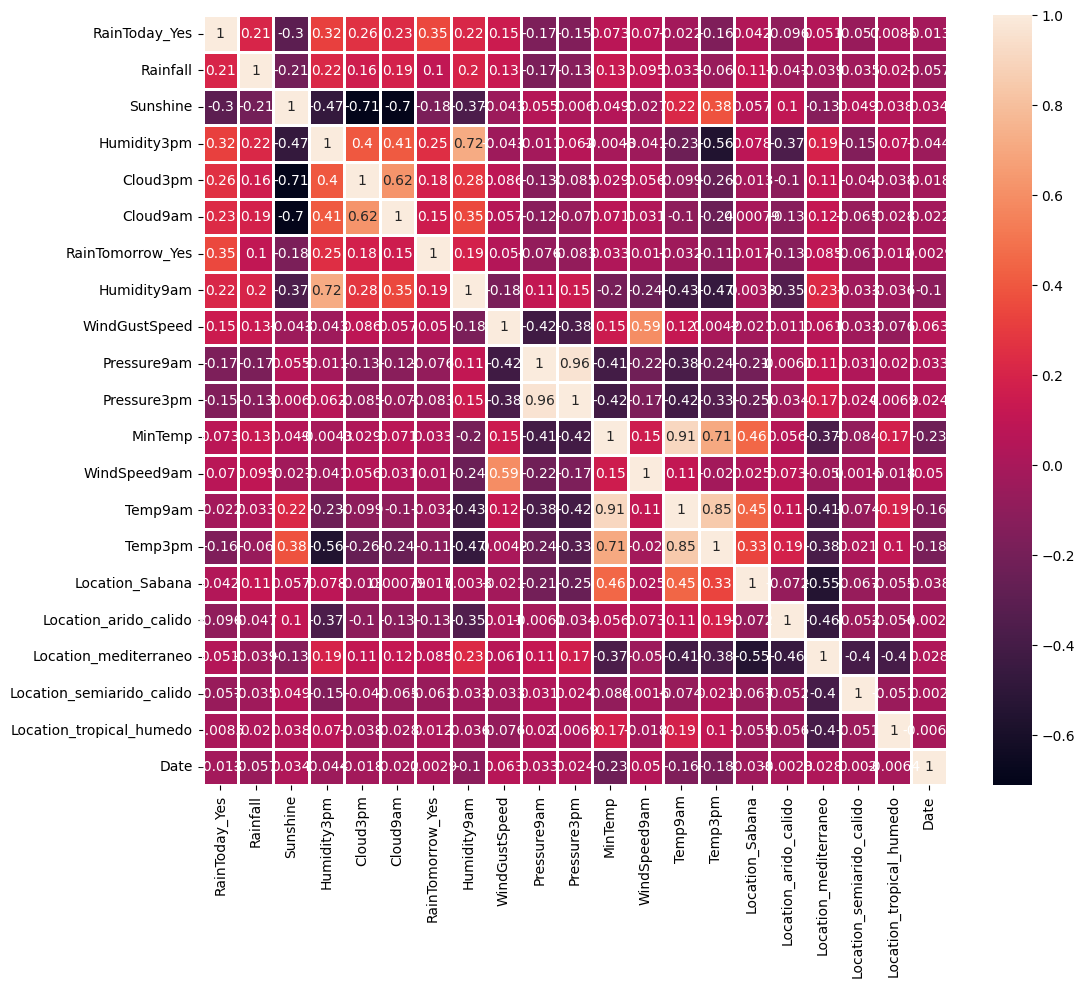

In [112]:
df_regresion = df_resampled[['RainToday_Yes','Rainfall','Sunshine','Humidity3pm','Cloud3pm','Cloud9am','RainTomorrow_Yes','Humidity9am','WindGustSpeed','Pressure9am','Pressure3pm','MinTemp','WindSpeed9am','Temp9am','Temp3pm',"Location_Sabana","Location_arido_calido","Location_mediterraneo","Location_semiarido_calido","Location_tropical_humedo", 'Date']]
corr = df_regresion.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, linewidths=.9)
plt.show()



#### Target seleccionado : RainTomorrow_Yes

### Separamos datos de entrenamiento y testeo

In [114]:
from sklearn.model_selection import train_test_split


# separar el dataframe en train y test con un 80% para train y 20% para test y random_state=42 y stratify=df['CUPO_L1']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df_regresion.drop(['RainTomorrow_Yes'], axis=1), df_regresion['RainTomorrow_Yes'], test_size=0.2, random_state=42)


### Modelos sin hiperparámetros

Realizaremos un entrenamiento previo sin hiperparámetros para tener una vista preliminar del posible mejor modelo, los modelos seleccionados serán:

- DecisionTreeRegressor
- RandomForestRegressor
- GradientBoostingRegressor
- SVR
- KNeighborsRegressor
- SGDRegressor

In [115]:
# importar todos los modelos de regresion de sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor




#### Modelos sin hiperparámetros

In [116]:

# inicializar los modelos de regresion con los parametros por defecto


dtR = DecisionTreeRegressor()
rfR = RandomForestRegressor()
gbR = GradientBoostingRegressor()
knnR = KNeighborsRegressor()
sgdR = SGDRegressor()


### Entrenamiento de los modelos

In [117]:
# entrenar los modelos de regresion con los datos de train

dtR.fit(X_train_reg, y_train_reg)
rfR.fit(X_train_reg, y_train_reg)
gbR.fit(X_train_reg, y_train_reg)
knnR.fit(X_train_reg, y_train_reg)
sgdR.fit(X_train_reg, y_train_reg)


# generar una lista con todos los modelos de regresion
models = [dtR, rfR, gbR, knnR, sgdR]



### Vista del R² y Raíz del error cuadrática medio

In [121]:
# for que recorra la lista de modelos y que imprima el MAE, MSE y RMSE, R2 de cada modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
i = 1
for model in models:
    y_pred_reg = model.predict(X_test_reg)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(f'El MSE del modelo es {mean_squared_error(y_test_reg, y_pred_reg):.3f}')
    print(f'El RMSE del modelo es {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.3f}')
    print(f'El R² del modelo es {r2_score(y_test_reg, y_pred_reg):.2f}\n')
    print('-'*100,'\n')
    i += 1

1° Modelo de Clasificación -> DecisionTreeRegressor()

----------------------------------------------------------------------------------------------------
El MSE del modelo es 0.205
El RMSE del modelo es 0.453
El R² del modelo es 0.18

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestRegressor()

----------------------------------------------------------------------------------------------------
El MSE del modelo es 0.100
El RMSE del modelo es 0.316
El R² del modelo es 0.60

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingRegressor()

----------------------------------------------------------------------------------------------------
El MSE del modelo es 0.136
El RMSE del modelo es 0.368
El R² del modelo es 0.46

-------------------------------------------------------------------------------

### Entrenamiento de Modelos con hiperparámetros

#### GradientBoostingRegressor

##### GradientBoostingRegressor V1

In [122]:
gbV1 = GradientBoostingRegressor( learning_rate=0.1, n_estimators=100, max_depth=3, tol=2, random_state=42)
gbV1.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(random_state=42, tol=2)

##### GradientBoostingRegressor V2

In [123]:
gbV2 = GradientBoostingRegressor(
    learning_rate=0.1, n_estimators=500, max_depth=3, tol=2, random_state=42)
gbV2.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(n_estimators=500, random_state=42, tol=2)

##### GradientBoostingRegressor V3

In [124]:
gbV3 = GradientBoostingRegressor(
    learning_rate=0.1, n_estimators=100, max_depth=30, tol=2, random_state=42)
gbV3.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(max_depth=30, random_state=42, tol=2)

##### GradientBoostingRegressor V4

In [125]:
gbV4 = GradientBoostingRegressor(learning_rate=0.4, n_estimators=3, max_depth=300, tol=1e-2, random_state=42)
gbV4.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(learning_rate=0.4, max_depth=300, n_estimators=3,
                          random_state=42, tol=0.01)

##### GradientBoostingRegressor V5

In [126]:
gbV5 = GradientBoostingRegressor( learning_rate=0.4, n_estimators=1, max_depth=3000, tol=1e-2, random_state=42)
gbV5.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(learning_rate=0.4, max_depth=3000, n_estimators=1,
                          random_state=42, tol=0.01)

##### GradientBoostingRegressor V6

##### Revisión de R² y RMSE de las 6 versiones de GradientBoostingRegressor 

In [127]:
models = [gbV1, gbV2, gbV3, gbV4, gbV5]
i = 1
for model in models:
    y_pred_reg = model.predict(X_test_reg)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(
        f'El MSE del modelo es {mean_squared_error(y_test_reg, y_pred_reg):.3f}')
    print(f'El RMSE del modelo es {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.3f}')
    print(f'El R² del modelo es {r2_score(y_test_reg, y_pred_reg):.2f}\n')
    print('-'*100, '\n')
    i += 1

1° Modelo de Clasificación -> GradientBoostingRegressor(random_state=42, tol=2)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 0.136
El RMSE del modelo es 0.368
El R² del modelo es 0.46

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> GradientBoostingRegressor(n_estimators=500, random_state=42, tol=2)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 0.112
El RMSE del modelo es 0.335
El R² del modelo es 0.55

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingRegressor(max_depth=30, random_state=42, tol=2)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 0.147
El RMSE del modelo es 0.383

#### DecisionTreeRegressor

In [128]:
dtrV1 = DecisionTreeRegressor(
    min_samples_split=5, min_samples_leaf=5, random_state=42)

dtrV1.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=5, random_state=42)

#### RandomForestRegressor

##### RandomForestRegressor V1

In [129]:
rfRV1 = RandomForestRegressor(min_samples_split=5, min_samples_leaf=5, random_state=42,
                           bootstrap=True, max_samples=0.8, n_estimators=3, max_depth=40)

rfRV1.fit(X_train_reg, y_train_reg)

RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=3, random_state=42)

##### RandomForestRegressor V2

In [130]:
rfRV2 = RandomForestRegressor(min_samples_split=20, min_samples_leaf=20, random_state=42,
                           bootstrap=True, max_samples=0.8, n_estimators=12, max_depth=40)

rfRV2.fit(X_train_reg, y_train_reg)

RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=20,
                      min_samples_split=20, n_estimators=12, random_state=42)

#### KNeighborsRegressor

In [131]:
knnRV1 = KNeighborsRegressor(
    n_neighbors=2000, weights='distance', algorithm='auto', leaf_size=40, p=2)

knnRV1.fit(X_train_reg, y_train_reg)

KNeighborsRegressor(leaf_size=40, n_neighbors=2000, weights='distance')

In [132]:

# generar una lista con todos los modelos de regresion
models = [dtrV1, rfRV1, rfRV2, knnRV1]

i=1
# for que recorra la lista de modelos y que imprima el RMSE, R2 de cada modelo
for model in models:
    y_pred_reg = model.predict(X_test_reg)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(
        f'El MSE del modelo es {mean_squared_error(y_test_reg, y_pred_reg):.3f}')
    print(
        f'El RMSE del modelo es $ {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.3f}')
    print(f'El R² del modelo es {r2_score(y_test_reg, y_pred_reg):.2f}\n')
    print('-'*100,'\n')
    i = i + 1


1° Modelo de Clasificación -> DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=5, random_state=42)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 0.161
El RMSE del modelo es $ 0.401
El R² del modelo es 0.36

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=3, random_state=42)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 0.128
El RMSE del modelo es $ 0.358
El R² del modelo es 0.49

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=20,
                      min_sampl

###  Decisión

Los tres mejores modelos fueron los siguientes:

- RandomForestRegressor() 
    R²: 0.58
    RandomForestRegressor ofrece el mejor rendimiento con un R² de 0.58. Su capacidad para manejar características no lineales y alta dimensionalidad lo hace ideal para datos complejos como los meteorológicos. Además, su naturaleza de ensemble ayuda a reducir el sobreajuste.

- RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=20, min_samples_split=20, n_estimators=12, random_state=42)
    R²: 0.52
    Este modelo optimizado de RandomForestRegressor, aunque ligeramente inferior al anterior, sigue siendo robusto. Las especificaciones de profundidad máxima y tamaño de muestra ayudan a controlar el sobreajuste, proporcionando un buen equilibrio entre sesgo y varianza.

- GradientBoostingRegressor(n_estimators=500, random_state=42, tol=2)
    R²: 0.53
    GradientBoostingRegressor con n_estimators ajustado a 500 ofrece un rendimiento cercano al mejor modelo de RandomForest. Su enfoque de boosting mejora iterativamente la precisión.

Teniendo en cuenta estos resultados el elegido será random fores sin hiper parametros

### Clasificación

#### Target seleccionado : RainTomorrow_Yes


Para nuestra predicción hemos definido la variable objecto **RainTomorrow_Yes**, para ello nos apoyaremos en las siguientes variables

<Axes: >

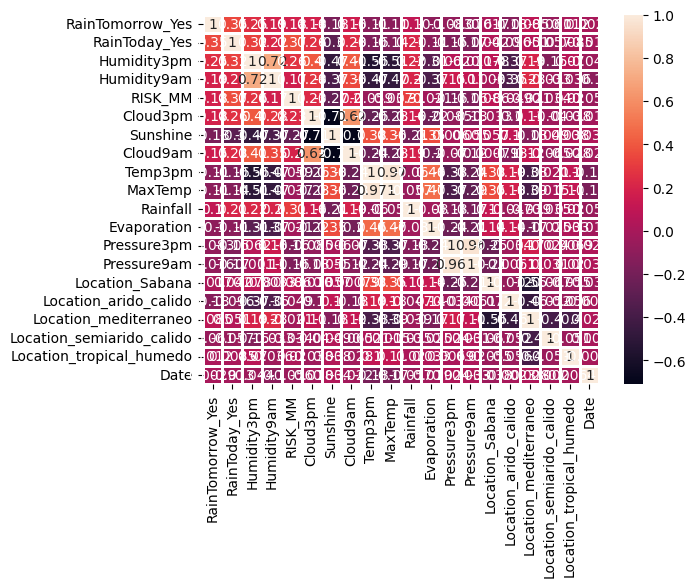

In [162]:
df_clas = df_resampled[['RainTomorrow_Yes','RainToday_Yes','Humidity3pm','Humidity9am','RISK_MM','Cloud3pm','Sunshine','Cloud9am','Temp3pm','MaxTemp','Rainfall','Evaporation','Pressure3pm','Pressure9am',"Location_Sabana","Location_arido_calido","Location_mediterraneo","Location_semiarido_calido","Location_tropical_humedo", 'Date']]
corr = df_clas.corr()
sns.heatmap(corr, annot=True, linewidths=.9)


Importe de librerías 

In [163]:
# importar todos los modelos de clasificacion de sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

### Separamos datos de entrenamiento y testeo

In [164]:
# separar train y test de def_clas con un 80% para train y 20% para test y random_state=42
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
    df_clas.drop(['RainTomorrow_Yes'], axis=1), df_clas['RainTomorrow_Yes'], test_size=0.2, random_state=42)


### Modelos sin hiperparámetros

Realizaremos un entrenamiento previo sin hiperparámetros para tener una vista preliminar del posible mejor modelo, los modelos seleccionados serán:

- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- KNeighborsClassifier


In [165]:
dt = DecisionTreeClassifier()
dt.fit(X_train_clas, y_train_clas)

DecisionTreeClassifier()

In [166]:
rf = RandomForestClassifier()
rf.fit(X_train_clas, y_train_clas)


RandomForestClassifier()

In [167]:
gb = GradientBoostingClassifier()
gb.fit(X_train_clas, y_train_clas)


GradientBoostingClassifier()

In [168]:
knn = KNeighborsClassifier()
knn.fit(X_train_clas, y_train_clas)


KNeighborsClassifier()

### Entrenamiento de Modelos con hiperparámetros

#### DecisionTreeClassifier

##### DecisionTreeClassifier V1

In [169]:
dt_1 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
dt_1.fit(X_train_clas, y_train_clas)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

##### DecisionTreeClassifier V2

In [170]:
dt_2 = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='gini')
dt_2.fit(X_train_clas, y_train_clas)


DecisionTreeClassifier(max_depth=2, random_state=42)

##### DecisionTreeClassifier V3

In [171]:
dt_3 = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='log_loss')
dt_3.fit(X_train_clas, y_train_clas)


DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=42)

##### DecisionTreeClassifier V4

In [172]:
dt_4 = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='gini', min_samples_leaf=10)
dt_4.fit(X_train_clas, y_train_clas)


DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=42)

#### RandomForestClassifier 

##### RandomForestClassifier V1

In [173]:
rf_1 = RandomForestClassifier(max_depth=2, random_state=42)
rf_1.fit(X_train_clas, y_train_clas)


RandomForestClassifier(max_depth=2, random_state=42)

##### RandomForestClassifier V2

In [174]:
rf_2 = RandomForestClassifier(max_depth=3, random_state=42)
rf_2.fit(X_train_clas, y_train_clas)


RandomForestClassifier(max_depth=3, random_state=42)

##### RandomForestClassifier V3

In [175]:
rf_3 = RandomForestClassifier(max_depth=15, random_state=42)
rf_3.fit(X_train_clas, y_train_clas)

RandomForestClassifier(max_depth=15, random_state=42)

##### RandomForestClassifier V4

In [176]:
rf_4 = RandomForestClassifier(max_depth=3, random_state=42,
                              min_samples_leaf=10, n_estimators=1000)
rf_4.fit(X_train_clas, y_train_clas)


RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

##### RandomForestClassifier V5

In [177]:
rf_5 = RandomForestClassifier(max_depth=3, random_state=42,
                              min_samples_leaf=10, n_estimators=1000, max_features='sqrt')
rf_5.fit(X_train_clas, y_train_clas)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

##### RandomForestClassifier V6

In [178]:
rf_6 = RandomForestClassifier(max_depth=3, random_state=42, min_samples_leaf=10,
                              n_estimators=1000, max_features='log2', max_samples=0.8)
rf_6.fit(X_train_clas, y_train_clas)

RandomForestClassifier(max_depth=3, max_features='log2', max_samples=0.8,
                       min_samples_leaf=10, n_estimators=1000, random_state=42)

#### GradientBoostingClassifier

##### GradientBoostingClassifier V1

In [179]:
gb_1 = GradientBoostingClassifier(max_depth=2, random_state=42)
gb_1.fit(X_train_clas, y_train_clas)


GradientBoostingClassifier(max_depth=2, random_state=42)

##### GradientBoostingClassifier V2

In [180]:
gb_2 = GradientBoostingClassifier(loss='exponential' ,learning_rate=0.1, n_estimators=150, max_depth=3, random_state=42)
gb_2.fit(X_train_clas, y_train_clas)

GradientBoostingClassifier(loss='exponential', n_estimators=150,
                           random_state=42)

##### GradientBoostingClassifier V3

In [181]:
gb_3 = GradientBoostingClassifier(
    learning_rate=0.001, n_estimators=1500, max_depth=3, random_state=42, min_samples_leaf=10)
gb_3.fit(X_train_clas, y_train_clas)

GradientBoostingClassifier(learning_rate=0.001, min_samples_leaf=10,
                           n_estimators=1500, random_state=42)

#### KNeighborsClassifier

##### KNeighborsClassifier V1

In [182]:
knn_1 = KNeighborsClassifier(n_neighbors=2)
knn_1.fit(X_train_clas, y_train_clas)


KNeighborsClassifier(n_neighbors=2)

Se genera una lista con los modelos

In [183]:
models = [  dt, rf, gb, knn, 
            dt_1, dt_2, dt_3, dt_4, 
            rf_1, rf_2, rf_3, rf_4, rf_5, rf_6,
            gb_1, gb_2, gb_3,
            knn_1]


### Vista del Matriz de confusión y suma de aciertos

1° Modelo de Clasificación -> DecisionTreeClassifier()



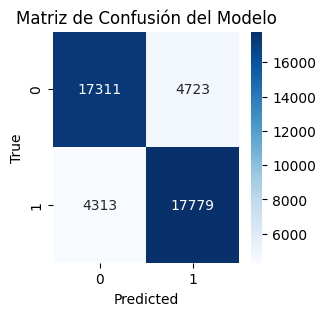

Suma de la diagonal de la matriz de confusión del modelo es: 35090

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestClassifier()



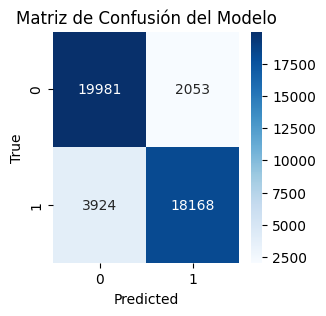

Suma de la diagonal de la matriz de confusión del modelo es: 38149

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingClassifier()



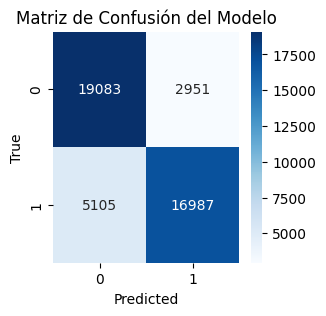

Suma de la diagonal de la matriz de confusión del modelo es: 36070

---------------------------------------------------------------------------------------------------- 

4° Modelo de Clasificación -> KNeighborsClassifier()



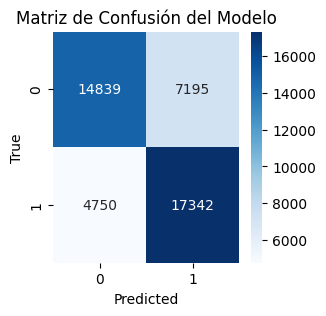

Suma de la diagonal de la matriz de confusión del modelo es: 32181

---------------------------------------------------------------------------------------------------- 

5° Modelo de Clasificación -> DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)



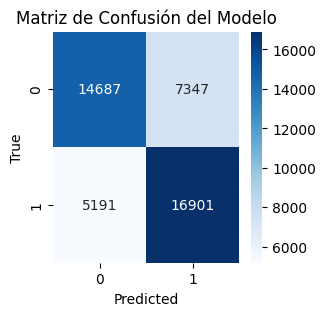

Suma de la diagonal de la matriz de confusión del modelo es: 31588

---------------------------------------------------------------------------------------------------- 

6° Modelo de Clasificación -> DecisionTreeClassifier(max_depth=2, random_state=42)



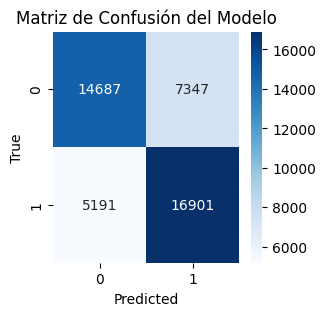

Suma de la diagonal de la matriz de confusión del modelo es: 31588

---------------------------------------------------------------------------------------------------- 

7° Modelo de Clasificación -> DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=42)



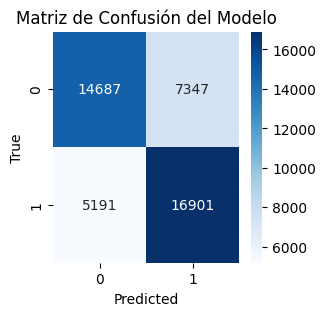

Suma de la diagonal de la matriz de confusión del modelo es: 31588

---------------------------------------------------------------------------------------------------- 

8° Modelo de Clasificación -> DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=42)



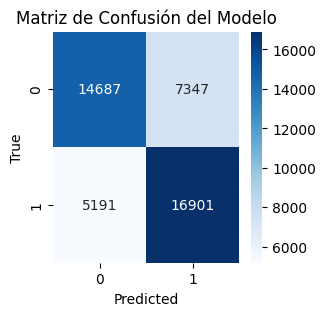

Suma de la diagonal de la matriz de confusión del modelo es: 31588

---------------------------------------------------------------------------------------------------- 

9° Modelo de Clasificación -> RandomForestClassifier(max_depth=2, random_state=42)



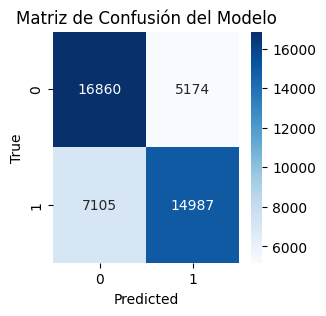

Suma de la diagonal de la matriz de confusión del modelo es: 31847

---------------------------------------------------------------------------------------------------- 

10° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, random_state=42)



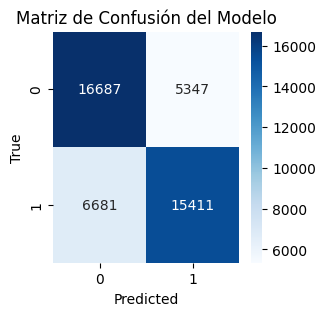

Suma de la diagonal de la matriz de confusión del modelo es: 32098

---------------------------------------------------------------------------------------------------- 

11° Modelo de Clasificación -> RandomForestClassifier(max_depth=15, random_state=42)



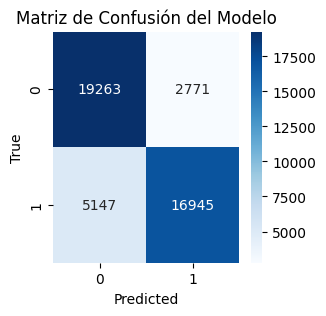

Suma de la diagonal de la matriz de confusión del modelo es: 36208

---------------------------------------------------------------------------------------------------- 

12° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)



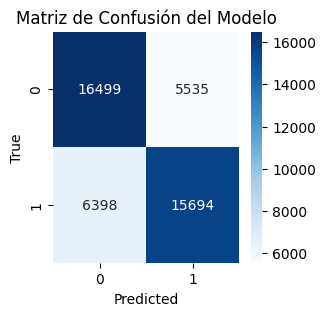

Suma de la diagonal de la matriz de confusión del modelo es: 32193

---------------------------------------------------------------------------------------------------- 

13° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)



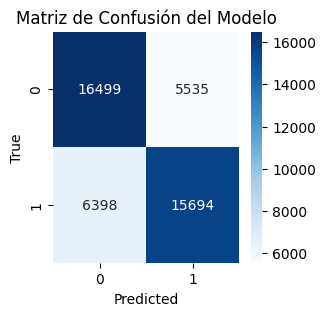

Suma de la diagonal de la matriz de confusión del modelo es: 32193

---------------------------------------------------------------------------------------------------- 

14° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, max_features='log2', max_samples=0.8,
                       min_samples_leaf=10, n_estimators=1000, random_state=42)



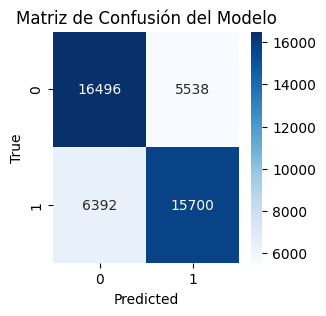

Suma de la diagonal de la matriz de confusión del modelo es: 32196

---------------------------------------------------------------------------------------------------- 

15° Modelo de Clasificación -> GradientBoostingClassifier(max_depth=2, random_state=42)



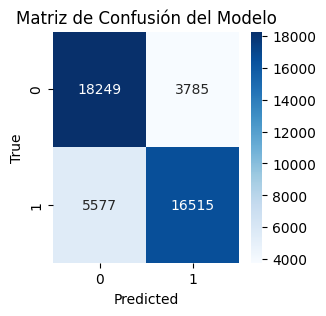

Suma de la diagonal de la matriz de confusión del modelo es: 34764

---------------------------------------------------------------------------------------------------- 

16° Modelo de Clasificación -> GradientBoostingClassifier(loss='exponential', n_estimators=150,
                           random_state=42)



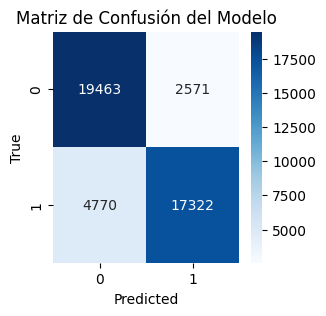

Suma de la diagonal de la matriz de confusión del modelo es: 36785

---------------------------------------------------------------------------------------------------- 

17° Modelo de Clasificación -> GradientBoostingClassifier(learning_rate=0.001, min_samples_leaf=10,
                           n_estimators=1500, random_state=42)



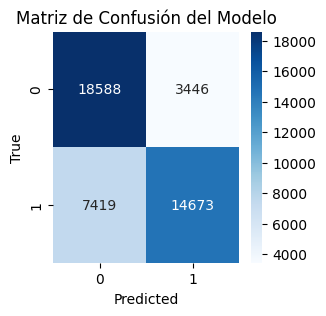

Suma de la diagonal de la matriz de confusión del modelo es: 33261

---------------------------------------------------------------------------------------------------- 

18° Modelo de Clasificación -> KNeighborsClassifier(n_neighbors=2)



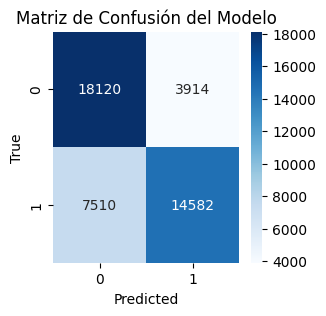

Suma de la diagonal de la matriz de confusión del modelo es: 32702

---------------------------------------------------------------------------------------------------- 



In [184]:
# matriz de confusion para cada modelo de clasificacion
from sklearn.metrics import confusion_matrix, classification_report
i=1
for model in models:

    y_pred_clas = model.predict(X_test_clas)
    cm = confusion_matrix(y_test_clas, y_pred_clas)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    # grafico de matriz de confusion con la diagonal en un color distinto
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Matriz de Confusión del Modelo')
    plt.show()
    
    print(
        f'Suma de la diagonal de la matriz de confusión del modelo es: {cm.trace()}\n')
    print('-'*100,'\n')

    i += 1

### Analisis de accuracy, sensibilidad, precisión y F1

In [185]:
# for que recorra la lista de modelos y que imprima el accuracy, precision, recall, f1-score de cada modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
i = 1
for model in models:
    y_pred_clas = model.predict(X_test_clas)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(f'El accuracy del modelo es {accuracy_score(y_test_clas, y_pred_clas):.2f}')
    print(f'El precision del modelo es {precision_score(y_test_clas, y_pred_clas):.2f}')
    print(f'El recall del modelo es {recall_score(y_test_clas, y_pred_clas):.2f}')
    print(f'El f1-score del modelo es {f1_score(y_test_clas, y_pred_clas):.2f}\n')
    print('-'*100,'\n')
    i += 1

    

1° Modelo de Clasificación -> DecisionTreeClassifier()

----------------------------------------------------------------------------------------------------
El accuracy del modelo es 0.80
El precision del modelo es 0.79
El recall del modelo es 0.80
El f1-score del modelo es 0.80

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestClassifier()

----------------------------------------------------------------------------------------------------
El accuracy del modelo es 0.86
El precision del modelo es 0.90
El recall del modelo es 0.82
El f1-score del modelo es 0.86

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingClassifier()

----------------------------------------------------------------------------------------------------
El accuracy del modelo es 0.82
El precision del modelo es 0.85
El recal

### Gráficos de la curva curva ROC/AUC

In [186]:
import  matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
def plot_roc_chart(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(3, 3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs


### Gráfico y comparación

1° Modelo de Clasificación -> DecisionTreeClassifier()

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.80 vs 0.80 de accuracy
generando una diferencia de -0.00



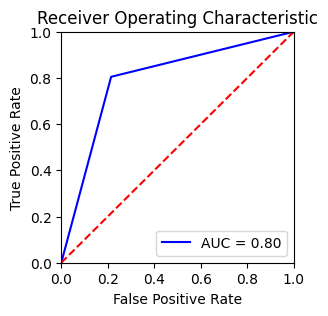

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestClassifier()

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.86 vs 0.86 de accuracy
generando una diferencia de 0.00



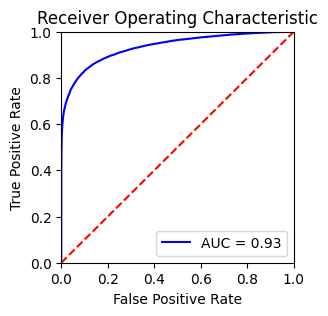

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingClassifier()

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.82 vs 0.82 de accuracy
generando una diferencia de 0.00



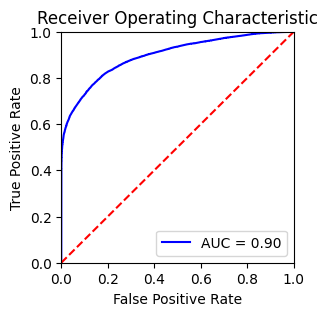

---------------------------------------------------------------------------------------------------- 

4° Modelo de Clasificación -> KNeighborsClassifier()

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.73 vs 0.73 de accuracy
generando una diferencia de -0.00



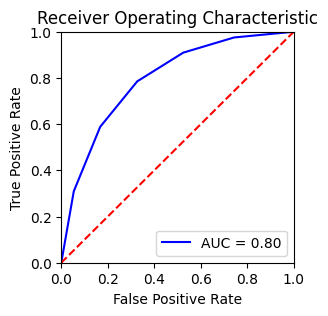

---------------------------------------------------------------------------------------------------- 

5° Modelo de Clasificación -> DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.72 vs 0.72 de accuracy
generando una diferencia de -0.00



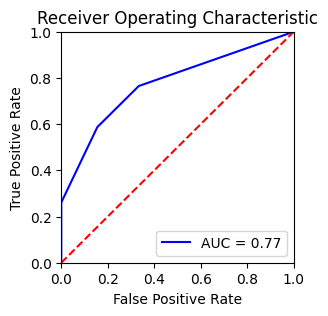

---------------------------------------------------------------------------------------------------- 

6° Modelo de Clasificación -> DecisionTreeClassifier(max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.72 vs 0.72 de accuracy
generando una diferencia de -0.00



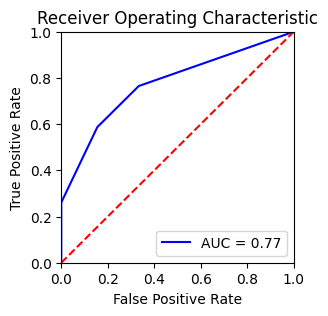

---------------------------------------------------------------------------------------------------- 

7° Modelo de Clasificación -> DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.72 vs 0.72 de accuracy
generando una diferencia de -0.00



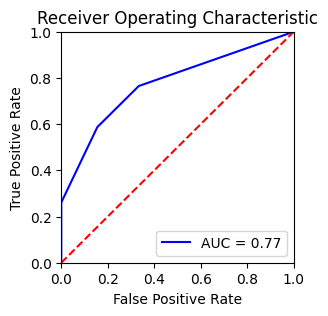

---------------------------------------------------------------------------------------------------- 

8° Modelo de Clasificación -> DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.72 vs 0.72 de accuracy
generando una diferencia de -0.00



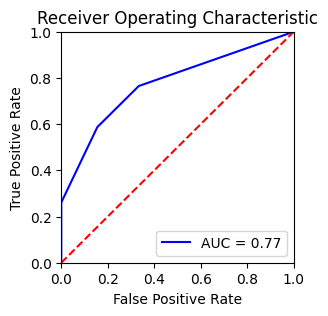

---------------------------------------------------------------------------------------------------- 

9° Modelo de Clasificación -> RandomForestClassifier(max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.72 vs 0.72 de accuracy
generando una diferencia de 0.00



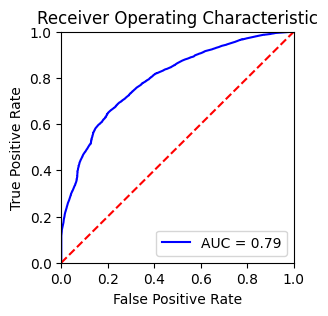

---------------------------------------------------------------------------------------------------- 

10° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.73 vs 0.73 de accuracy
generando una diferencia de 0.00



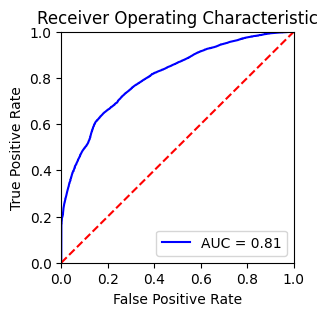

---------------------------------------------------------------------------------------------------- 

11° Modelo de Clasificación -> RandomForestClassifier(max_depth=15, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.82 vs 0.82 de accuracy
generando una diferencia de 0.00



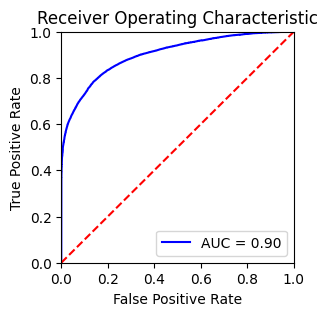

---------------------------------------------------------------------------------------------------- 

12° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.73 vs 0.73 de accuracy
generando una diferencia de 0.00



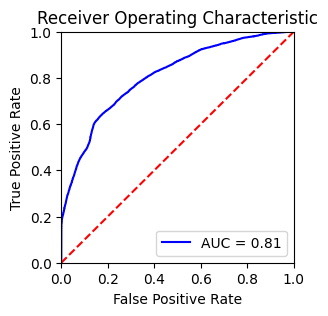

---------------------------------------------------------------------------------------------------- 

13° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.73 vs 0.73 de accuracy
generando una diferencia de 0.00



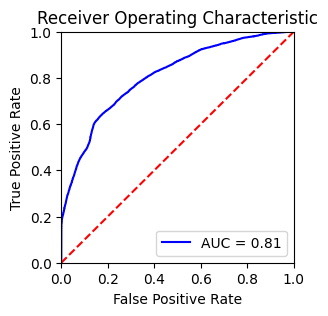

---------------------------------------------------------------------------------------------------- 

14° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, max_features='log2', max_samples=0.8,
                       min_samples_leaf=10, n_estimators=1000, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.73 vs 0.73 de accuracy
generando una diferencia de 0.00



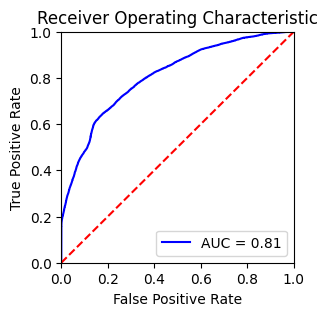

---------------------------------------------------------------------------------------------------- 

15° Modelo de Clasificación -> GradientBoostingClassifier(max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.79 vs 0.79 de accuracy
generando una diferencia de 0.00



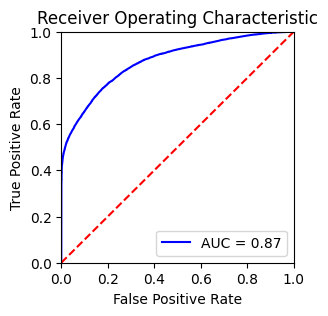

---------------------------------------------------------------------------------------------------- 

16° Modelo de Clasificación -> GradientBoostingClassifier(loss='exponential', n_estimators=150,
                           random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.83 vs 0.83 de accuracy
generando una diferencia de 0.00



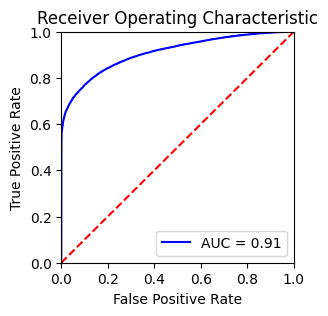

---------------------------------------------------------------------------------------------------- 

17° Modelo de Clasificación -> GradientBoostingClassifier(learning_rate=0.001, min_samples_leaf=10,
                           n_estimators=1500, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.75 vs 0.75 de accuracy
generando una diferencia de 0.00



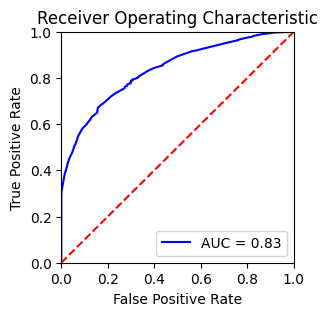

---------------------------------------------------------------------------------------------------- 

18° Modelo de Clasificación -> KNeighborsClassifier(n_neighbors=2)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.74 vs 0.74 de accuracy
generando una diferencia de 0.00



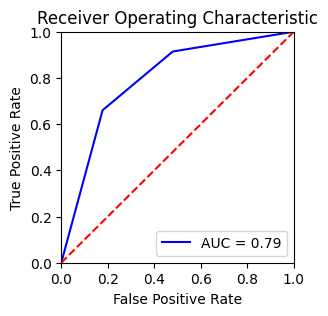

---------------------------------------------------------------------------------------------------- 



In [187]:
# trazar la curva ROC/AUC para cada modelo de clasificacion comparando con las clasificaciones

from sklearn.metrics import roc_curve, auc
i = 1
for model in models:
    y_pred_clas = model.predict(X_test_clas)
    fpr, tpr, thresholds = roc_curve(y_test_clas, y_pred_clas)
    roc_auc = auc(fpr, tpr)
    accuaracy = accuracy_score(y_test_clas, y_pred_clas)
    dif = roc_auc - accuaracy
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(
        f'El área bajo la curva ROC del modelo es {roc_auc:.2f} vs {accuaracy:.2f} de accuracy')
    print(f'generando una diferencia de {dif:.2f}\n')
    plot_roc_chart(model, X_test_clas, y_test_clas)
    print('-'*100,'\n')
    i += 1


### Características más importantes

In [188]:
## Identifica las características más importantes del dataset usando RandomForest

for score, name in zip(rf_1.feature_importances_, X_train_clas.columns):
    print(f'La característica {name} tiene un score de {score:.2f}')


La característica RainToday_Yes tiene un score de 0.39
La característica Humidity3pm tiene un score de 0.06
La característica Humidity9am tiene un score de 0.02
La característica RISK_MM tiene un score de 0.16
La característica Cloud3pm tiene un score de 0.04
La característica Sunshine tiene un score de 0.05
La característica Cloud9am tiene un score de 0.06
La característica Temp3pm tiene un score de 0.00
La característica MaxTemp tiene un score de 0.00
La característica Rainfall tiene un score de 0.15
La característica Evaporation tiene un score de 0.01
La característica Pressure3pm tiene un score de 0.00
La característica Pressure9am tiene un score de 0.00
La característica Location_Sabana tiene un score de 0.00
La característica Location_arido_calido tiene un score de 0.03
La característica Location_mediterraneo tiene un score de 0.01
La característica Location_semiarido_calido tiene un score de 0.02
La característica Location_tropical_humedo tiene un score de 0.00
La característica

### Decisión

El algoritmo utilizado,será el modelo N° 9 __RandomForestClassifier__ sin hiperparámetros ya que es el que mejor predice los Verdaderos negativos con 5.545, dando asi un recall de **81%**, y también es el que nos da el mayor accuracy con un **0.85%**

RandomForestClassifier()
Accuracy: 0.85
Precision: 0.89
Recall: 0.81
F1-Score: 0.85
Este modelo presenta el mejor rendimiento general con los valores más altos de precisión y F1-score

# Modelos no supervisado

### Casos de uso para aprendizaje no supervisado

Para esto usaremos las columnas 'RainToday_Yes','Rainfall','Sunshine','Humidity3pm','Cloud3pm','Cloud9am','RainTomorrow_Yes','Humidity9am','WindGustSpeed','Pressure9am','Pressure3pm','MinTemp','WindSpeed9am','Temp9am','Temp3pm'

1. Clasificación para saber si llovera mañana:
- Cluster 1: No
- Cluster 2: Si

2. Clasificación por Tipo de clima:

- Cluster 1: Clima Tropical.
- Cluster 2: Clima Desértico.
- Cluster 3: Clima Mediterráneo.
- Cluster 4: Clima Oceánico.

### Clusterización

Ya que nuestro caso de uso elegido es el Clasificación por Tipo de Cliente, tenemos como hipótesis usar aproximadamente 4-6 clusters usaremos un rango de 2 a 11, para cumplir con los 10 k's distintos solicitados

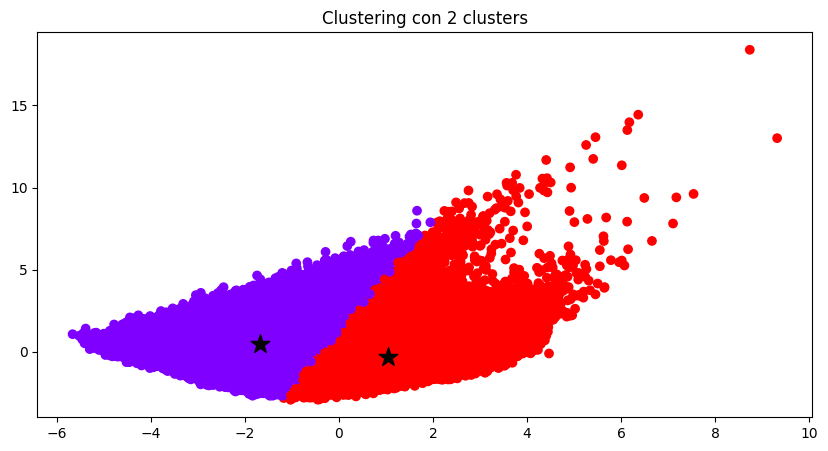

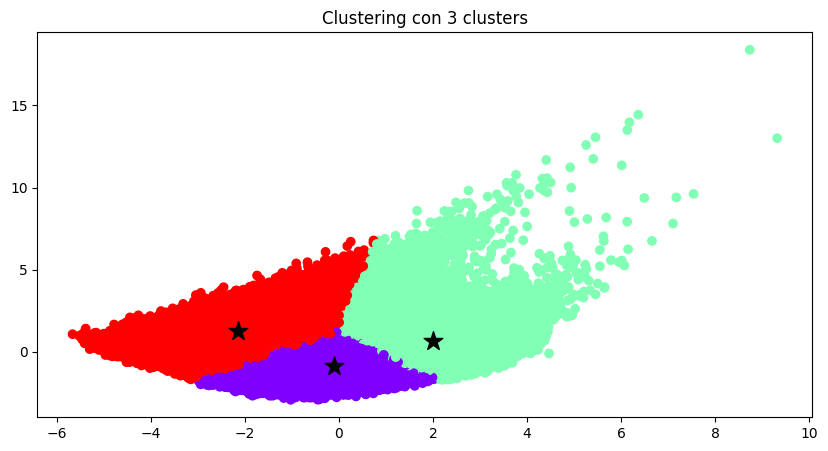

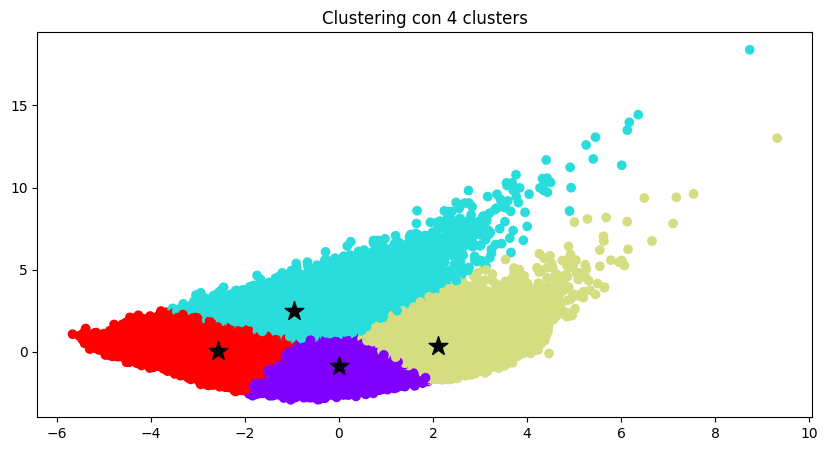

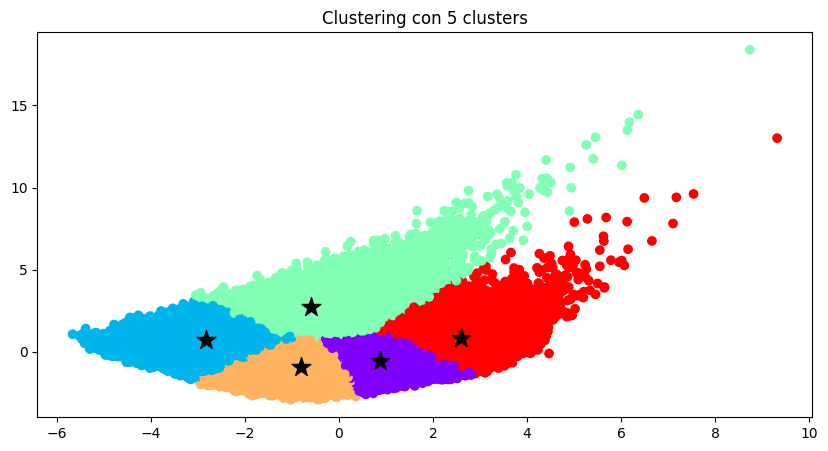

In [189]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Rango de clusters a probar
k_range = np.arange(2, 6)

# crear un df_clustering usando el df con las columnas
df_clustering_complete = df[['RainToday_Yes','Humidity3pm','Cloud3pm','Sunshine','Temp3pm','Rainfall','Pressure3pm',"Location_Sabana","Location_arido_calido","Location_mediterraneo","Location_semiarido_calido","Location_tropical_humedo", 'Date']]

# Normalizar el df_clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clustering = scaler.fit_transform(df_clustering_complete)


# Reducir la dimensionalidad del df_clustering a 2 dimensiones usando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_clustering = pca.fit_transform(df_clustering)





# realizar el clustering con MiniBatchKMeans
inertia = []
silhouette = []
for k in k_range:
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42, n_init=10)
    mbk.fit(df_clustering)
    inertia.append(mbk.inertia_)
    silhouette.append(silhouette_score(df_clustering, mbk.labels_))
    # graficar la clusterizacion con el valor de k y el valor de rand separando los clusters por colores y mostrando el centroide de cada cluster, separando las clusters por colores y con lineas
    plt.figure(figsize=(10, 5))
    plt.scatter(df_clustering[:, 0], df_clustering[:, 1], c=mbk.labels_, cmap='rainbow')
    plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], marker='*', s=200, c='#050505')
    plt.title(f'Clustering con {k} clusters')
    plt.show()




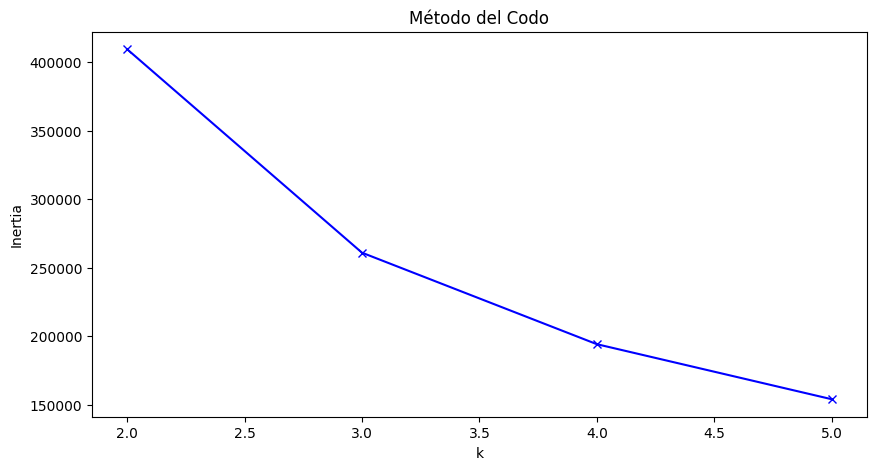

In [190]:
# relizar el metodo del codo para encontrar el numero de clusters optimo

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()



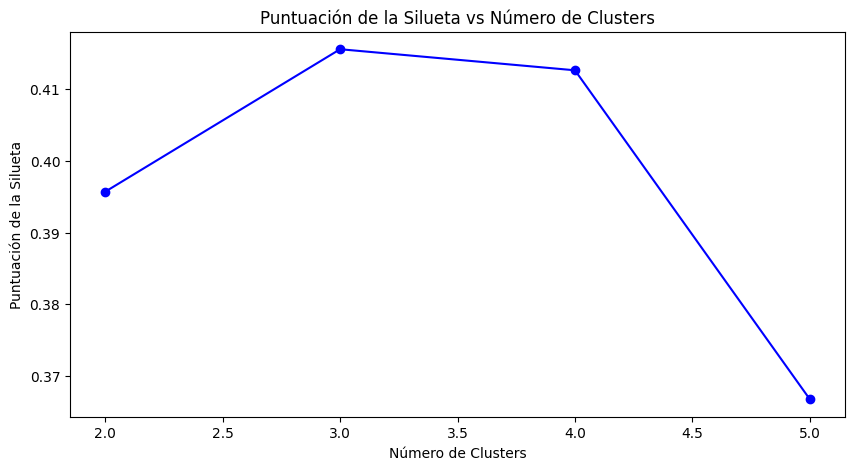

In [191]:
# Graficar la puntuación de la silueta para diferentes valores de k
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette, marker='o', linestyle='-', color='b')
plt.title('Puntuación de la Silueta vs Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de la Silueta')
plt.show()

Utilizando la gráfica para ver cual tiene menor inercia hemos decidido el numero k=3 como codo

#### Decisión de clasificación 

Ya que el algoritmo dio 3 clusters cambiaremos la definición anterior a la siguiente:

1. Clasificación por tipo de Clima: Un ejemplo de clusterización sería:
- Cluster 1: Clima Tropical.
- Cluster 2: Clima Desértico.
- Cluster 3: Clima Mediterráneo.

## Elección de regresión

Para determinar los mejores tres modelos de regresión seleccionaremos aquellos con el menor MSE y RMSE, y el mayor R², lo que indica un mejor rendimiento en términos de precisión y ajuste del modelo.
Estos son los mejores tres modelos basados en estas métricas:


Modelo 2: RandomForestRegressor()  
MSE: 0.100  
RMSE: 0.316  
R²: 0.60  

Modelo 12: RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=20, min_samples_split=20, n_estimators=12, random_state=42)  
MSE: 0.114  
RMSE: 0.337  
R²: 0.55  

Modelo 6: GradientBoostingRegressor(n_estimators=500, random_state=42, tol=2)  
MSE: 0.112  
RMSE: 0.335  
R²: 0.55  

*Según estos resultados el elegido será el Modelo 2: RandomForestRegressor(), lo cual no esperabamos al ser el modelo sin hiper parametros pero la vida nos da sorpresas todos los días.*

## Elección de clasificación

Por otra parte, aquí están los mejores tres modelos basados en el f1-score y teniendo en cuenta métricas como el accuracy, precision, recall y f1-score.:

Modelo 2: RandomForestClassifier()  
Accuracy: 0.86  
Precision: 0.90  
Recall: 0.82  
F1-Score: 0.86  

Modelo 16: GradientBoostingClassifier(loss='exponential', n_estimators=150, random_state=42)  
Accuracy: 0.83  
Precision: 0.87  
Recall: 0.78  
F1-Score: 0.83  

Modelo 3: GradientBoostingClassifier()  
Accuracy: 0.82  
Precision: 0.85  
Recall: 0.77  
F1-Score: 0.81  

*Estos modelos tienen los f1-scores más altos y, por lo tanto, son los mejores en términos de equilibrio entre precision y recall. Además, estos modelos también tienen altos valores de accuracy y precision, lo que sugiere un buen rendimiento general dando como elegido el Modelo 2: RandomForestClassifier(), siendo uno de los modelos probados sin hiper parámetros y logrando las mejores métricas.*